In [1]:
from runner import run, run_special
from data import get_dataset
import numpy as np
from math import sqrt
import os
import h5py
#for spann
import sys; sys.path.append("/root/SPTAG/Release"); sys.path.append("/root/flann/src/python")
import pandas as pd


from plot import metrics as fn_metrics
import matplotlib.pyplot as plt
import seaborn as sns
from result import load_all_results
import pickle
import os
import h5py
import numpy as np
from math import sqrt

sns.set_style("whitegrid")
color_settings = {'FLANN': 'tab:blue', 'spann': 'tab:orange', 'hnsw': 'tab:red', 'IVFADCR': 'tab:green'}

In [2]:
dataset = 'mnist-784-euclidean'
K = 3
D, dimension = get_dataset(dataset)
metric = D.attrs['distance']

In [ ]:
for dataset in datasets:
    hdf5_fn = os.path.join('/root/autodl-tmp', '%s.hdf5' % dataset)
    hdf5_f = h5py.File(hdf5_fn, 'r')
    
    X_train = np.array(hdf5_f['train'])
    X_test = np.array(hdf5_f['test'])
    print(dataset, X_train.dtype, X_test.dtype)

audio_192_euclidean float64 float64
lastfm-64-dot float32 float64


In [ ]:
for building_arguments in [{"target_precision": i , 'metric' : metric} for i in [0.2, 0.5, 0.7, 0.8, 0.9, 0.95, 0.97]]:
    algo = 'FLANN'
    run_special(algo, dataset, building_arguments, K)

[1] Using AVX2 InstructionSet!
downloading http://ann-benchmarks.com/imageNet_150_euclidean.hdf5 -> data/imageNet_150_euclidean.hdf5...


In [9]:
for building_arguments in [{"n_lists": i , "M" : dimension // 2, "nbits" : 8, 
                      "M_refine" : dimension // 2,
                      "nbits_refine" : 8, 'metric' : metric} for i in [64,256,1024,4096]]:
    query_arguments = [[i] for i in [1, 5, 10, 50, 100, 200]]
    algo = 'IVFADCR'
    run(algo, dataset, building_arguments, query_arguments, K)

got a train set of size (1000000 * 128)
got 10000 queries
Built index in 218.16338181495667
Index size:  84988.0
Running query argument 1 of 6...
Run 1/5...
Processed 1000/10000 queries...
Processed 2000/10000 queries...
Processed 3000/10000 queries...
Processed 4000/10000 queries...
Processed 5000/10000 queries...
Processed 6000/10000 queries...
Processed 7000/10000 queries...
Processed 8000/10000 queries...
Processed 9000/10000 queries...
Processed 10000/10000 queries...
Run 2/5...
Processed 1000/10000 queries...
Processed 2000/10000 queries...
Processed 3000/10000 queries...
Processed 4000/10000 queries...
Processed 5000/10000 queries...
Processed 6000/10000 queries...
Processed 7000/10000 queries...
Processed 8000/10000 queries...
Processed 9000/10000 queries...
Processed 10000/10000 queries...
Run 3/5...
Processed 1000/10000 queries...
Processed 2000/10000 queries...
Processed 3000/10000 queries...
Processed 4000/10000 queries...
Processed 5000/10000 queries...
Processed 6000/1000

In [4]:
building_arguments = {"mode": 'KDT', 'metric' : metric}
query_arguments = [[100], [200], [400], [1000], [2000], [4000]]
algo = 'spann'
run(algo, dataset, building_arguments, query_arguments, K)

[1] Using AVX2 InstructionSet!
got a train set of size (1000000 * 128)
got 10000 queries
[1] Setting NumberOfThreads with value 32
[1] Setting DistCalcMethod with value L2
[1] Start to build KDTree 1
[1] 1 KDTree built, 999998 1000000
[1] Build Tree time (s): 2
[1] build RNG graph!
[1] Parallel TpTree Partition begin
[1] Finish Getting Leaves for Tree 2
[1] Finish Getting Leaves for Tree 0
[1] Finish Getting Leaves for Tree 1
[1] Finish Getting Leaves for Tree 3
[1] Finish Getting Leaves for Tree 6
[1] Finish Getting Leaves for Tree 4
[1] Finish Getting Leaves for Tree 7
[1] Finish Getting Leaves for Tree 5
[1] Finish Getting Leaves for Tree 8
[1] Finish Getting Leaves for Tree 11
[1] Finish Getting Leaves for Tree 10
[1] Finish Getting Leaves for Tree 12
[1] Finish Getting Leaves for Tree 9
[1] Finish Getting Leaves for Tree 18
[1] Finish Getting Leaves for Tree 21
[1] Finish Getting Leaves for Tree 14
[1] Finish Getting Leaves for Tree 16
[1] Finish Getting Leaves for Tree 13
[1] Fin

In [ ]:
for building_arguments in [{"M": i,  "ef_construction": 500, 'metric' : metric} for i in [4, 8, 96]]:
    query_arguments = [[i] for i in [10, 20, 40, 80, 120, 200, 400, 600, 800]]
    algo = 'hnsw'
    run(algo, dataset, building_arguments, query_arguments, K)

got a train set of size (292385 * 65)
got 50000 queries
Built index in 21.385538578033447
Index size:  101984.0
Running query argument 1 of 9...
Run 1/5...
Processed 1000/50000 queries...
Processed 2000/50000 queries...
Processed 3000/50000 queries...
Processed 4000/50000 queries...
Processed 5000/50000 queries...
Processed 6000/50000 queries...
Processed 7000/50000 queries...
Processed 8000/50000 queries...
Processed 9000/50000 queries...
Processed 10000/50000 queries...
Processed 11000/50000 queries...
Processed 12000/50000 queries...
Processed 13000/50000 queries...
Processed 14000/50000 queries...
Processed 15000/50000 queries...
Processed 16000/50000 queries...
Processed 17000/50000 queries...
Processed 18000/50000 queries...
Processed 19000/50000 queries...
Processed 20000/50000 queries...
Processed 21000/50000 queries...
Processed 22000/50000 queries...
Processed 23000/50000 queries...
Processed 24000/50000 queries...
Processed 25000/50000 queries...
Processed 26000/50000 querie

# Test

In [14]:
building_arguments = {"M": 64,  "ef_construction": 500, 'metric' : metric}
query_arguments = [[i] for i in [10, 20, 40, 80, 120, 200, 400, 600, 800]]
algo = 'hnsw'
run(algo, dataset, building_arguments, query_arguments, K)

got a train set of size (292385 * 65)
got 50000 queries
Built index in 30.202378273010254
Index size:  267744.0
Running query argument 1 of 9...
Run 1/5...
Processed 1000/50000 queries...
Processed 2000/50000 queries...
Processed 3000/50000 queries...
Processed 4000/50000 queries...
Processed 5000/50000 queries...
Processed 6000/50000 queries...
Processed 7000/50000 queries...
Processed 8000/50000 queries...
Processed 9000/50000 queries...
Processed 10000/50000 queries...
Processed 11000/50000 queries...
Processed 12000/50000 queries...
Processed 13000/50000 queries...
Processed 14000/50000 queries...
Processed 15000/50000 queries...
Processed 16000/50000 queries...
Processed 17000/50000 queries...
Processed 18000/50000 queries...
Processed 19000/50000 queries...
Processed 20000/50000 queries...
Processed 21000/50000 queries...
Processed 22000/50000 queries...
Processed 23000/50000 queries...
Processed 24000/50000 queries...
Processed 25000/50000 queries...
Processed 26000/50000 querie

In [4]:
building_arguments = {"n_lists": 64 , "M" : 13, "nbits" : 8, 
                      "M_refine" : 13,
                      "nbits_refine" : 8, 'metric' : metric}
query_arguments = [[i] for i in [1, 5, 10, 50, 100, 200]]
algo = 'IVFADCR'
run(algo, dataset, building_arguments, query_arguments, K)

[1] Using AVX2 InstructionSet!
got a train set of size (292385 * 65)
got 50000 queries
Built index in 16.573508977890015
Index size:  24692.0
Running query argument 1 of 6...
Run 1/5...
Processed 1000/50000 queries...
Processed 2000/50000 queries...
Processed 3000/50000 queries...
Processed 4000/50000 queries...
Processed 5000/50000 queries...
Processed 6000/50000 queries...
Processed 7000/50000 queries...
Processed 8000/50000 queries...
Processed 9000/50000 queries...
Processed 10000/50000 queries...
Processed 11000/50000 queries...
Processed 12000/50000 queries...
Processed 13000/50000 queries...
Processed 14000/50000 queries...
Processed 15000/50000 queries...
Processed 16000/50000 queries...
Processed 17000/50000 queries...
Processed 18000/50000 queries...
Processed 19000/50000 queries...
Processed 20000/50000 queries...
Processed 21000/50000 queries...
Processed 22000/50000 queries...
Processed 23000/50000 queries...
Processed 24000/50000 queries...
Processed 25000/50000 queries..

In [4]:
building_arguments = {"mode": 'KDT', 'metric' : metric}
query_arguments = [[100], [200], [400], [1000], [2000], [4000]]
algo = 'spann'
run(algo, dataset, building_arguments, query_arguments, K)

[1] Using AVX2 InstructionSet!
got a train set of size (292385 * 65)
got 50000 queries
[1] Setting NumberOfThreads with value 32
[1] Setting DistCalcMethod with value Cosine
[1] Start to build KDTree 1
[1] 1 KDTree built, 292383 292385
[1] Build Tree time (s): 0
[1] build RNG graph!
[1] Parallel TpTree Partition begin
[1] Finish Getting Leaves for Tree 0
[1] Finish Getting Leaves for Tree 1
[1] Finish Getting Leaves for Tree 2
[1] Finish Getting Leaves for Tree 3
[1] Finish Getting Leaves for Tree 4
[1] Finish Getting Leaves for Tree 5
[1] Finish Getting Leaves for Tree 6
[1] Finish Getting Leaves for Tree 7
[1] Finish Getting Leaves for Tree 8
[1] Finish Getting Leaves for Tree 9
[1] Finish Getting Leaves for Tree 10
[1] Finish Getting Leaves for Tree 11
[1] Finish Getting Leaves for Tree 12
[1] Finish Getting Leaves for Tree 13
[1] Finish Getting Leaves for Tree 14
[1] Finish Getting Leaves for Tree 15
[1] Finish Getting Leaves for Tree 16
[1] Finish Getting Leaves for Tree 17
[1] Fi

# Plot

In [5]:
datasets = [
    "audio_192_euclidean",
    "lastfm-64-dot",
    "cifar_512_euclidean",
    "millionSong_420_euclidean",
    "deep-image-96-angular",
    "deep-image-96-angular-0.1M",
    "deep-image-96-angular-1M",
    "mnist-784-euclidean",
    "enron_1369_euclidean",
    "notre_128_euclidean",
    "fashion-mnist-784-euclidean",
    "nuswide_500_euclidean",
    "gist-960-euclidean",
    "nytimes-256-angular",
    "sift-128-euclidean",
    "glove-100-angular",
    "sun_512_euclidean",
    "glove-200-angular",
    "trevi_4096_euclidean",
    "glove-25-angular",
    "ukbench_128_euclidean",
    "glove-50-angular",
    "imageNet_150_euclidean"
]

In [6]:


data = {
    'Dataset': ['audio_192_euclidean', 'cifar_512_euclidean', 'deep-image-96-angular', 'deep-image-96-angular-0.1M',
                'deep-image-96-angular-1M', 'enron_1369_euclidean', 'fashion-mnist-784-euclidean', 'gist-960-euclidean',
                'glove-25-angular', 'glove-50-angular', 'glove-100-angular', 'glove-200-angular',
                'imageNet_150_euclidean', 'lastfm-64-dot', 'millionSong_420_euclidean', 'mnist-784-euclidean',
                'notre_128_euclidean', 'nuswide_500_euclidean', 'nytimes-256-angular', 'sift-128-euclidean',
                'sun_512_euclidean', 'trevi_4096_euclidean', 'ukbench_128_euclidean'],
    'Dimensions': [192, 512, 96, 96, 96, 1369, 784, 960, 25, 50, 100, 200, 150, 65, 420, 784, 128, 500, 256, 128, 512, 4096, 128],
    'train_sizes' : [
    50000,
    60000,
    9990000,
    99900,
    999000,
    85187,
    60000,
    1000000,
    1183514,
    1183514,
    1183514,
    1183514,
    2400000,
    292385,
    1000000,
    60000,
    300000,
    2700000,
    290000,
    1000000,
    80000,
    100000,
    1000000
],
    'Size':[]
}


for dataset in data['Dataset']:
    filepath = f'../autodl-tmp/{dataset}.hdf5'
    size_in_bytes = os.path.getsize(filepath)
    size_in_mb = size_in_bytes / (1024 * 1024)
    data['Size'].append(size_in_mb)
    
df = pd.DataFrame(data)
with open('bf.pickle', 'rb') as f:
    bf_time = pickle.load(f)
new_col_df = pd.DataFrame(list(bf_time.items()), columns=['Dataset', 'bf_time'])
#print(new_col_df)
df = pd.merge(df, new_col_df, on='Dataset')


df

,Dataset,Dimensions,train_sizes,Size,bf_time
0,audio_192_euclidean,192,50000,86.133789,0.002331
1,cifar_512_euclidean,512,60000,203.730957,0.002590
2,deep-image-96-angular,96,9990000,3669.746674,0.229771
3,deep-image-96-angular-0.1M,96,99900,47.883789,0.001690
4,deep-image-96-angular-1M,96,999000,377.144043,0.016880
5,enron_1369_euclidean,1369,85187,1001.831261,0.010190
6,fashion-mnist-784-euclidean,784,60000,216.987885,0.002750
7,gist-960-euclidean,960,1000000,3666.542328,0.050297
8,glove-25-angular,25,1183514,121.459663,0.015654
9,glove-50-angular,50,1183514,235.282028,0.016515


<Axes: xlabel='Dataset'>

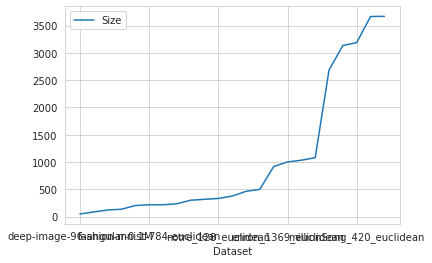

In [7]:
sorted_df = df.sort_values(by='Size')
sorted_df.plot(x='Dataset', y='Size')


In [8]:
sorted_df = df.sort_values(by='Size')
sorted_datasets_size = sorted_df['Dataset'].tolist()
sorted_datasets_size

['deep-image-96-angular-0.1M',
 'audio_192_euclidean',
 'glove-25-angular',
 'lastfm-64-dot',
 'cifar_512_euclidean',
 'fashion-mnist-784-euclidean',
 'mnist-784-euclidean',
 'glove-50-angular',
 'nytimes-256-angular',
 'sun_512_euclidean',
 'notre_128_euclidean',
 'deep-image-96-angular-1M',
 'glove-100-angular',
 'sift-128-euclidean',
 'glove-200-angular',
 'enron_1369_euclidean',
 'nuswide_500_euclidean',
 'ukbench_128_euclidean',
 'imageNet_150_euclidean',
 'trevi_4096_euclidean',
 'millionSong_420_euclidean',
 'gist-960-euclidean',
 'deep-image-96-angular']

In [9]:
sorted_df = df.sort_values(by='Dimensions')
sorted_datasets_dim = sorted_df['Dataset'].tolist()
sorted_datasets_dim

['glove-25-angular',
 'glove-50-angular',
 'lastfm-64-dot',
 'deep-image-96-angular',
 'deep-image-96-angular-0.1M',
 'deep-image-96-angular-1M',
 'glove-100-angular',
 'ukbench_128_euclidean',
 'sift-128-euclidean',
 'notre_128_euclidean',
 'imageNet_150_euclidean',
 'audio_192_euclidean',
 'glove-200-angular',
 'nytimes-256-angular',
 'millionSong_420_euclidean',
 'nuswide_500_euclidean',
 'cifar_512_euclidean',
 'sun_512_euclidean',
 'fashion-mnist-784-euclidean',
 'mnist-784-euclidean',
 'gist-960-euclidean',
 'enron_1369_euclidean',
 'trevi_4096_euclidean']

In [10]:
sorted_df = df.sort_values(by='train_sizes')
sorted_datasets_data_point = sorted_df['Dataset'].tolist()
sorted_datasets_data_point



['audio_192_euclidean',
 'cifar_512_euclidean',
 'fashion-mnist-784-euclidean',
 'mnist-784-euclidean',
 'sun_512_euclidean',
 'enron_1369_euclidean',
 'deep-image-96-angular-0.1M',
 'trevi_4096_euclidean',
 'nytimes-256-angular',
 'lastfm-64-dot',
 'notre_128_euclidean',
 'deep-image-96-angular-1M',
 'sift-128-euclidean',
 'millionSong_420_euclidean',
 'ukbench_128_euclidean',
 'gist-960-euclidean',
 'glove-100-angular',
 'glove-50-angular',
 'glove-25-angular',
 'glove-200-angular',
 'imageNet_150_euclidean',
 'nuswide_500_euclidean',
 'deep-image-96-angular']

In [12]:
angular_datasets = [ds for ds in datasets if 'angular' in ds]
print(angular_datasets)

['deep-image-96-angular', 'deep-image-96-angular-0.1M', 'deep-image-96-angular-1M', 'nytimes-256-angular', 'glove-100-angular', 'glove-200-angular', 'glove-25-angular', 'glove-50-angular']


In [13]:
euclidean_datasets = [ds for ds in datasets if 'euclidean' in ds]
print(euclidean_datasets)

['audio_192_euclidean', 'cifar_512_euclidean', 'millionSong_420_euclidean', 'mnist-784-euclidean', 'enron_1369_euclidean', 'notre_128_euclidean', 'fashion-mnist-784-euclidean', 'nuswide_500_euclidean', 'gist-960-euclidean', 'sift-128-euclidean', 'sun_512_euclidean', 'trevi_4096_euclidean', 'ukbench_128_euclidean', 'imageNet_150_euclidean']


In [14]:
glove_datasets = [ds for ds in datasets if 'glove' in ds]
print(glove_datasets)

['glove-100-angular', 'glove-200-angular', 'glove-25-angular', 'glove-50-angular']


In [14]:
len(datasets)

23

In [11]:
algorithms = [
    "FLANN",
    "spann",
    "hnsw",
    "IVFADCR"
]

## Sanity check

In [13]:
def check(src_base):
    
    #should return all empty sets
    
    dataset_difference = []
    algo_difference = []
    setting_difference = []
    run_difference = []
    
    for dataset_name in os.listdir(src_base):
        dataset_src = os.path.join(src_base, dataset_name)
        
        if os.path.isdir(dataset_src):
            for k in os.listdir(dataset_src):
                k_src = os.path.join(dataset_src, k)

                if os.path.isdir(k_src):
                    for algorithm_name in os.listdir(k_src):
                        algorithm_src = os.path.join(k_src, algorithm_name)

                        if os.path.isdir(algorithm_src):
                            for setting in os.listdir(algorithm_src):
                                setting_src = os.path.join(algorithm_src, setting)
                                
                                if os.path.isdir(setting_src):
                                    for run in os.listdir(setting_src):
                                        
                                        run_file = os.path.join(setting_src, run)
                                        if os.path.splitext(run_file)[-1] != '.hdf5':
                                            continue
                                        
                                        run_f = h5py.File(run_file, 'r')
                                        
                                        #print(run_f.attrs['dataset'], ' is ', dataset_name)
                                        #print(run_f.attrs['algo'], ' is ', algorithm_name)
                                        #print(run_f.attrs['building_arguments'], ' is ', setting)
                                        #print(run_f.attrs['query_argument'] + '.hdf5', ' is ', run)
                                        
                                        if run_f.attrs['dataset'] != dataset_name:
                                            dataset_difference.append(run_file)
                                        
                                        if run_f.attrs['algo'] != algorithm_name:
                                            algo_difference.append(run_file)
                                            
                                        if run_f.attrs['building_arguments'] != setting:
                                            setting_difference.append(run_file)
                                        
                                        try:
                                            if run_f.attrs['query_argument'] + '.hdf5' != run:
                                                run_difference.append(run_file)
                                        except:
                                            print(run_file)
                                        
    return dataset_difference, algo_difference, setting_difference, run_difference

In [14]:
check('results/')

results/sift-128-euclidean/3/hnsw/M_64_ef_construction_500_metric_euclidean/120.hdf5
results/sift-128-euclidean/3/hnsw/M_64_ef_construction_500_metric_euclidean/80.hdf5
results/sift-128-euclidean/3/hnsw/M_64_ef_construction_500_metric_euclidean/40.hdf5
results/sift-128-euclidean/3/hnsw/M_64_ef_construction_500_metric_euclidean/600.hdf5
results/sift-128-euclidean/3/hnsw/M_64_ef_construction_500_metric_euclidean/20.hdf5
results/sift-128-euclidean/3/hnsw/M_64_ef_construction_500_metric_euclidean/800.hdf5
results/sift-128-euclidean/3/hnsw/M_64_ef_construction_500_metric_euclidean/400.hdf5
results/sift-128-euclidean/3/hnsw/M_64_ef_construction_500_metric_euclidean/10.hdf5
results/sift-128-euclidean/3/hnsw/M_64_ef_construction_500_metric_euclidean/200.hdf5
results/sift-128-euclidean/3/hnsw/M_16_ef_construction_500_metric_euclidean/120.hdf5
results/sift-128-euclidean/3/hnsw/M_16_ef_construction_500_metric_euclidean/80.hdf5
results/sift-128-euclidean/3/hnsw/M_16_ef_construction_500_metric_eucl

([], [], [], [])

In [15]:
def get_ds(path, which):
    hdf5_fn = os.path.join(path, '%s.hdf5' % which)
    hdf5_f = h5py.File(hdf5_fn, 'r')

    # here for backward compatibility, to ensure old datasets can still be used with newer versions
    # cast to integer because the json parser (later on) cannot interpret numpy integers
    dimension = int(hdf5_f.attrs['dimension']) if 'dimension' in hdf5_f.attrs else len(hdf5_f['train'][0])

    return hdf5_f, dimension

In [16]:
def cache(path, datasets):
    if os.path.exists('cache.pickle'):
        os.remove('cache.pickle')
        
    
    results_to_store = {}

    for ds in datasets:
        all_results = calculate(path, ds)
        results_to_store[ds] = all_results


    # cache the dictionary to a file
    with open('cache.pickle', 'wb') as f:
        pickle.dump(results_to_store, f)



In [18]:
def calculate(path, dataset_name, count = 3):
    
    results = load_all_results(dataset_name, count)

    dataset, _ = get_ds(path, dataset_name)
    true_nn_distances = np.array(dataset["distances"])

    all_results = {}
    for i, (properties, run, fn, building_arguments) in enumerate(results):
        algo_name = properties['algo']
        #building_arguments = properties['building_arguments']
        #algo_name = properties['name']
       
        run_distances = np.array(run['distances'])
        
        build_time = properties['build_time']
        index_size = properties['index_size']
        
        times = np.array(run['times'])

        #metrics_cache = get_or_create_metrics(run)

        x_axis = fn_metrics['recall'](
            true_nn_distances,
            run_distances, times, properties)
        y_axis = fn_metrics['qps'](
            true_nn_distances,
            run_distances, times, properties)

        print('%3d: %80s %12.3f %12.3f %12.3f %12.3f' %
              (i, algo_name, x_axis, y_axis, build_time, index_size))

        all_results.setdefault(algo_name + '_' + building_arguments, []).append(
            (x_axis, y_axis, build_time, index_size, fn))
    
    return all_results



In [20]:
cache('/root/autodl-tmp', datasets)

  0:                                                                            FLANN        0.763     4874.420       97.713     3388.000
  1:                                                                            FLANN        0.922     2797.861      130.520        0.000
  2:                                                                            FLANN        0.861     3242.837      134.904        0.000
  3:                                                                            FLANN        0.647     7195.157       89.946        0.000
  4:                                                                            FLANN        0.465     9551.443       57.071        0.000
  5:                                                                            FLANN        0.180    13782.268       40.022     2504.000
  6:                                                                            FLANN        0.955     2092.458      137.262        0.000
  7:                              

In [22]:
import seaborn as sns


def find_strings_with_substring(str_list, substr):
    return [s for s in str_list if substr in s]

with open('cache.pickle', 'rb') as f:
    results = pickle.load(f)

algorithms = [
    "FLANN",
    "spann",
    "hnsw",
    "IVFADCR"
]
    
# Reshape the data into a long format
df_long = pd.DataFrame()
for algo in algorithms:
    for i, ds in enumerate(datasets):
        data_settings = list(results[ds].keys())
        algo_settings = find_strings_with_substring(data_settings, algo)
    
        for algo_setting in algo_settings:
            for query_result in results[ds][algo_setting]:
                df_temp = pd.DataFrame({'Algorithm': algo, 
                                        'Dataset': ds, 
                                        'Index size': query_result[3],
                                       'Index time': query_result[2],
                                       'recall': query_result[0],
                                       'qps': query_result[1],
                                       'building_argument': algo_setting,
                                       'query': query_result[4]}, 
                                       index=[0])
                df_long = pd.concat([df_long, df_temp])
print(df_long.head())

  Algorithm              Dataset  Index size  Index time    recall  \
0     FLANN  audio_192_euclidean      3388.0   97.713101  0.763467   
0     FLANN  audio_192_euclidean         0.0  130.519522  0.922033   
0     FLANN  audio_192_euclidean         0.0  134.904222  0.860667   
0     FLANN  audio_192_euclidean         0.0   89.946215  0.647367   
0     FLANN  audio_192_euclidean         0.0   57.071440  0.465467   

           qps                             building_argument   query  
0  4874.419578   FLANN_metric_euclidean_target_precision_0_8  1.hdf5  
0  2797.861052  FLANN_metric_euclidean_target_precision_0_95  1.hdf5  
0  3242.836858   FLANN_metric_euclidean_target_precision_0_9  1.hdf5  
0  7195.157327   FLANN_metric_euclidean_target_precision_0_7  1.hdf5  
0  9551.442655   FLANN_metric_euclidean_target_precision_0_5  1.hdf5  


In [23]:
df_long.to_excel('results.xlsx', index = False)

In [24]:
def pareto_frontier(points):
    pareto_points = []

    for point in points:
        dominated = False
        for other_point in points:
            if other_point != point and other_point[0] >= point[0] and other_point[1] >= point[1]:
                dominated = True
                break
        
        if not dominated:
            pareto_points.append(point)

    return pareto_points

def plot_graph(settings, results, ax, algo):
    

    
    
    points = []

    for setting in settings:
        xy = [(x, y) for x, y, _,_,_ in results[setting]]
        points.extend(xy)

    # Get the Pareto frontier points
    pareto_points = sorted(pareto_frontier(points), key=lambda point: point[0])

    # Unzip the points for plotting
    pareto_x, pareto_y = zip(*pareto_points)

    # Plot the original points and Pareto frontier points
    ax.plot(pareto_x, pareto_y, label=algo, color=color_settings[algo])
    ax.scatter(pareto_x, pareto_y, color=color_settings[algo]) 
    ax.set_yscale('log')
    ax.set_xlabel("recall")
    ax.set_ylabel("query per seconds")
    ax.legend(loc='lower left')

def find_strings_with_substring(str_list, substr):
    return [s for s in str_list if substr in s]

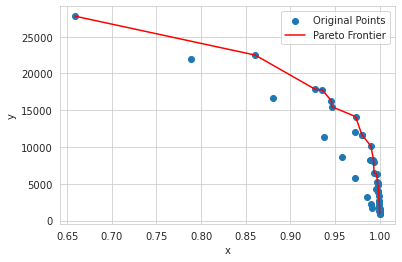

In [25]:
with open('cache.pickle', 'rb') as f:
    results = pickle.load(f)
    
ds = "audio_192_euclidean"
algo_list = list(results[ds].keys())
settings = find_strings_with_substring(algo_list, 'hnsw')

points = []

for setting in settings:
    xy = [(x, y) for x, y, _,_,_ in results[ds][setting]]
    points.extend(xy)

# Get the Pareto frontier points
pareto_points = sorted(pareto_frontier(points), key=lambda point: point[0])

# Unzip the points for plotting
x, y = zip(*points)
pareto_x, pareto_y = zip(*pareto_points)

# Plot the original points and Pareto frontier points
plt.scatter(x, y, label="Original Points")
plt.plot(pareto_x, pareto_y, color="red", label="Pareto Frontier")

# Add labels and legend
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

# Show the plot
plt.show()

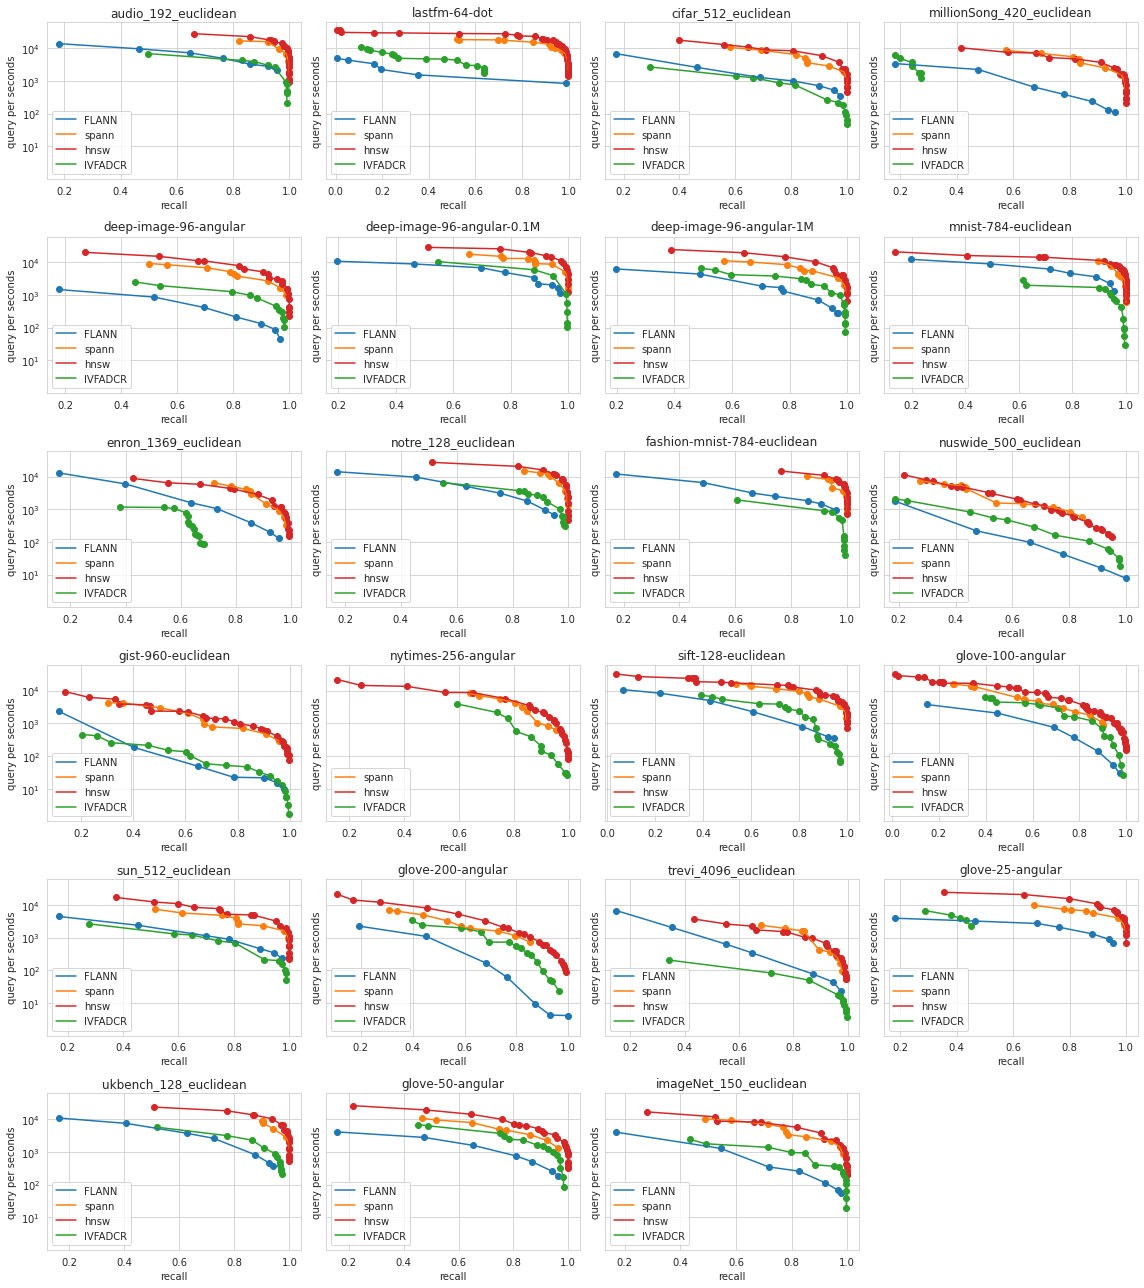

In [27]:
fig, axes = plt.subplots(nrows = 6, ncols=4, figsize=(16, 18), sharey=True)

with open('cache.pickle', 'rb') as f:
    results = pickle.load(f)
    
#results_list = list(results.keys())


for idx in range(6):
    for i, ds in enumerate(datasets[idx*4:idx*4+4]):
        for algo in algorithms:
            algo_list = list(results[ds].keys())
            if ds == 'nytimes-256-angular' and algo == 'FLANN':
                continue
            
            settings = find_strings_with_substring(algo_list, algo)
            plot_graph(settings, results[ds], axes[idx, i], algo)
            axes[idx, i].set_title(ds)

axes[5, 3].remove()

plt.tight_layout()
plt.show()
fig.savefig("qps_vs_recall.png")

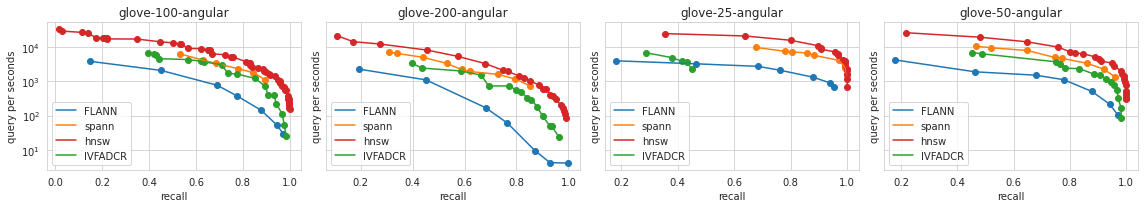

In [18]:
fig, axes = plt.subplots(nrows = 1, ncols=4, figsize=(16, 3), sharey=True)

with open('cache.pickle', 'rb') as f:
    results = pickle.load(f)
    
#results_list = list(results.keys())



for i, ds in enumerate(glove_datasets):
    for algo in algorithms:
        algo_list = list(results[ds].keys())
        if ds == 'nytimes-256-angular' and algo == 'FLANN':
            continue

        settings = find_strings_with_substring(algo_list, algo)
        plot_graph(settings, results[ds], axes[i], algo)
        axes[i].set_title(ds)

        

plt.tight_layout()
plt.show()
fig.savefig("qps_vs_recall.png")

In [29]:
def get_max_qps(settings, results, threshold):
    high_recall = []
    for setting in settings:
        for x, y, _, _, _ in results[setting]:
            if x >= threshold:
                high_recall.append(y)
        
    return max(high_recall) if high_recall else 0

In [30]:
import pandas as pd
with open('cache.pickle', 'rb') as f:
    results = pickle.load(f)
    
qps = np.zeros((23, 4))

for i, ds in enumerate(datasets):
    for j, algo in enumerate(algorithms):
        algo_list = list(results[ds].keys())
        
        if ds == 'nytimes-256-angular' and algo == 'FLANN':
            continue

        settings = find_strings_with_substring(algo_list, algo)
        max_qps = get_max_qps(settings, results[ds], 0.8)
        
        qps[i][j] = max_qps
        
df = pd.DataFrame(qps, columns=algorithms, index=datasets)
max_algorithms = df.idxmax(axis=1)
max_counts = max_algorithms.value_counts()
num_zeros = (df.eq(0)).sum()
print(df)
print(max_algorithms)
print(max_counts)
print(num_zeros)

                                   FLANN         spann          hnsw  \
audio_192_euclidean          3242.836858  16713.237726  22503.103744   
lastfm-64-dot                 833.418815  15303.993586  22935.703862   
cifar_512_euclidean           990.009302   6350.570283   8360.508331   
millionSong_420_euclidean     235.644534   5465.062812   4729.737745   
deep-image-96-angular         215.124497   4395.830405   7941.014316   
deep-image-96-angular-0.1M   3424.883396  13124.138341  20256.349331   
deep-image-96-angular-1M      707.712179   6563.578691  10504.373750   
mnist-784-euclidean          3594.608307  11289.471595  11246.091368   
enron_1369_euclidean          382.898387   4074.938854   2839.619695   
notre_128_euclidean          1795.544128  14963.202964  20519.897574   
fashion-mnist-784-euclidean  1810.545538  10119.682997  10933.087265   
nuswide_500_euclidean          15.991952    851.007796    641.812305   
gist-960-euclidean             21.764967    701.806309    996.65

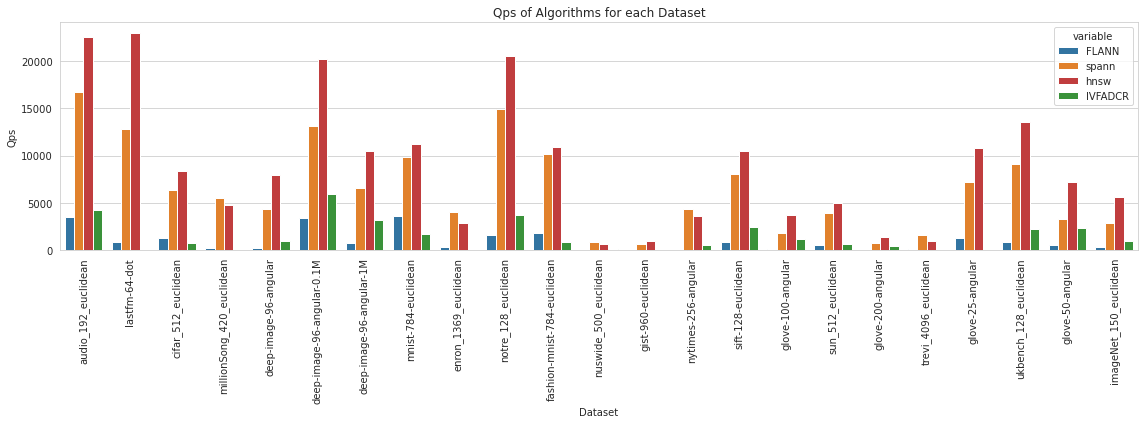

In [29]:
import seaborn as sns 

# Reshape the DataFrame to long format
df_long = df.reset_index().melt(id_vars=['index'], value_vars=algorithms)

# Create a bar chart using Seaborn

fig, ax = plt.subplots(figsize=(16, 6))
sns.barplot(x='index', y='value', hue='variable', data=df_long, palette=color_settings, ax=ax)
plt.xticks(rotation=90)

# Add axis labels and title
plt.xlabel('Dataset')
plt.ylabel('Qps')
plt.title('Qps of different algorithms with recall higher than 0.8')

# Adjust padding
fig.tight_layout()

# Show the plot
plt.show()
fig.savefig('qbs bar.png')

In [31]:
import pandas as pd
with open('cache.pickle', 'rb') as f:
    results = pickle.load(f)
    
qps = np.zeros((23, 4))

for i, ds in enumerate(datasets):
    for j, algo in enumerate(algorithms):
        algo_list = list(results[ds].keys())
        
        if ds == 'nytimes-256-angular' and algo == 'FLANN':
            continue

        settings = find_strings_with_substring(algo_list, algo)
        max_qps = get_max_qps(settings, results[ds], 0.9)
        
        qps[i][j] = max_qps
        
df = pd.DataFrame(qps, columns=algorithms, index=datasets)
max_algorithms = df.idxmax(axis=1)
max_counts = max_algorithms.value_counts()
num_zeros = (df.eq(0)).sum()
print(df)
print(max_algorithms)
print(max_counts)
print(num_zeros)

                                   FLANN         spann          hnsw  \
audio_192_euclidean          2797.861052  15785.043908  17856.627718   
lastfm-64-dot                 833.418815  12979.117204  17817.465186   
cifar_512_euclidean           706.351207   2840.606266   5884.239280   
millionSong_420_euclidean     130.225568   2481.181449   3654.528974   
deep-image-96-angular          88.077707   2718.938236   5123.727086   
deep-image-96-angular-0.1M   2049.313041   8810.607926  15871.745610   
deep-image-96-angular-1M      398.704621   3391.728179   6787.944229   
mnist-784-euclidean          2289.505491   7812.881453  11246.091368   
enron_1369_euclidean          201.716216   1431.103535   1875.555410   
notre_128_euclidean           943.246070  12002.703704  15864.277590   
fashion-mnist-784-euclidean  1450.483866   8138.797381  10933.087265   
nuswide_500_euclidean          15.991952      0.000000    246.284435   
gist-960-euclidean             21.764967    478.676911    587.89

In [32]:
import pandas as pd
with open('cache.pickle', 'rb') as f:
    results = pickle.load(f)
    
qps = np.zeros((23, 4))

for i, ds in enumerate(datasets):
    for j, algo in enumerate(algorithms):
        algo_list = list(results[ds].keys())
        
        if ds == 'nytimes-256-angular' and algo == 'FLANN':
            continue

        settings = find_strings_with_substring(algo_list, algo)
        max_qps = get_max_qps(settings, results[ds], 0.95)
        
        qps[i][j] = max_qps
        
df = pd.DataFrame(qps, columns=algorithms, index=datasets)
max_algorithms = df.idxmax(axis=1)
max_counts = max_algorithms.value_counts()
num_zeros = (df.eq(0)).sum()
print(df)
print(max_algorithms)
print(max_counts)
print(num_zeros)

                                   FLANN        spann          hnsw  \
audio_192_euclidean          2092.457571  9241.459816  14135.109586   
lastfm-64-dot                 833.418815  8530.124124  13354.950185   
cifar_512_euclidean           513.051756  1849.650457   3681.861099   
millionSong_420_euclidean     107.865670  1539.347724   2458.844598   
deep-image-96-angular          88.077707  1658.817057   3069.894170   
deep-image-96-angular-0.1M   1621.306928  5079.028017  11284.963970   
deep-image-96-angular-1M      287.953616  3391.728179   6787.944229   
mnist-784-euclidean          1306.017317  4505.491543   8556.507207   
enron_1369_euclidean          128.926862   907.295898   1164.636836   
notre_128_euclidean           664.539428  6157.372141  11274.047004   
fashion-mnist-784-euclidean   942.313413  3617.865197   8149.951345   
nuswide_500_euclidean           7.717809     0.000000    142.503184   
gist-960-euclidean             15.396764   289.890007    402.479570   
nytime

In [33]:
import pandas as pd
with open('cache.pickle', 'rb') as f:
    results = pickle.load(f)
    
qps = np.zeros((23, 4))

for i, ds in enumerate(datasets):
    for j, algo in enumerate(algorithms):
        algo_list = list(results[ds].keys())
        
        if ds == 'nytimes-256-angular' and algo == 'FLANN':
            continue

        settings = find_strings_with_substring(algo_list, algo)
        max_qps = get_max_qps(settings, results[ds], 0.98)
        
        qps[i][j] = max_qps
        
df = pd.DataFrame(qps, columns=algorithms, index=datasets)
max_algorithms = df.idxmax(axis=1)
max_counts = max_algorithms.value_counts()
num_zeros = (df.eq(0)).sum()
print(df)
print(max_algorithms)
print(max_counts)
print(num_zeros)

                                  FLANN        spann          hnsw  \
audio_192_euclidean            0.000000  6772.396010  11634.243026   
lastfm-64-dot                833.418815  7109.696944   9261.727337   
cifar_512_euclidean            0.000000  1849.650457   2368.987246   
millionSong_420_euclidean      0.000000  1539.347724   1585.281131   
deep-image-96-angular          0.000000  1033.323601   1580.482479   
deep-image-96-angular-0.1M     0.000000  5079.028017   9581.890671   
deep-image-96-angular-1M       0.000000  2028.874588   4081.436764   
mnist-784-euclidean            0.000000  3688.116307   6446.121995   
enron_1369_euclidean           0.000000   337.616181    568.578009   
notre_128_euclidean            0.000000  3698.738834   7829.919737   
fashion-mnist-784-euclidean    0.000000  3617.865197   5751.645388   
nuswide_500_euclidean          7.717809     0.000000      0.000000   
gist-960-euclidean             0.000000     0.000000    186.700399   
nytimes-256-angular 

In [34]:
import pandas as pd
with open('cache.pickle', 'rb') as f:
    results = pickle.load(f)
    
qps = np.zeros((23, 4))

for i, ds in enumerate(datasets):
    for j, algo in enumerate(algorithms):
        algo_list = list(results[ds].keys())
        
        if ds == 'nytimes-256-angular' and algo == 'FLANN':
            continue

        settings = find_strings_with_substring(algo_list, algo)
        max_qps = get_max_qps(settings, results[ds], 1)
        
        qps[i][j] = max_qps
        
df = pd.DataFrame(qps, columns=algorithms, index=datasets)
max_algorithms = df.idxmax(axis=1)
max_counts = max_algorithms.value_counts()
num_zeros = (df.eq(0)).sum()
print(df)
print(max_algorithms)
print(max_counts)
print(num_zeros)

                                FLANN  spann         hnsw  IVFADCR
audio_192_euclidean          0.000000    0.0     0.000000      0.0
lastfm-64-dot                0.000000    0.0     0.000000      0.0
cifar_512_euclidean          0.000000    0.0   465.640901      0.0
millionSong_420_euclidean    0.000000    0.0     0.000000      0.0
deep-image-96-angular        0.000000    0.0     0.000000      0.0
deep-image-96-angular-0.1M   0.000000    0.0  1198.849063      0.0
deep-image-96-angular-1M     0.000000    0.0     0.000000      0.0
mnist-784-euclidean          0.000000    0.0   664.261172      0.0
enron_1369_euclidean         0.000000    0.0     0.000000      0.0
notre_128_euclidean          0.000000    0.0   479.239871      0.0
fashion-mnist-784-euclidean  0.000000    0.0     0.000000      0.0
nuswide_500_euclidean        7.717809    0.0     0.000000      0.0
gist-960-euclidean           0.000000    0.0     0.000000      0.0
nytimes-256-angular          0.000000    0.0     0.000000     

# Time & Size

In [42]:
from result import load_all_results

def read_time_size(dataset_name, count=3):

    results = load_all_results(dataset_name, count)#dataset is string

    #dataset, _ = get_dataset(dataset)

    all_results = {}
    for i, (properties, run, fn, building_arguments) in enumerate(results):
        algo_name = properties['algo']

        build_time = properties['build_time']
        index_size = properties['index_size']
        
        if build_time <= 0:
            print("build_time:", dataset_name, building_arguments, build_time)
        if index_size <= 0:
            print("index size:", dataset_name, building_arguments, index_size)
            
            
        if algo_name == 'IVFADCR' and dataset_name == 'glove-100-angular':
            if building_arguments.split('_')[1] == '25' or building_arguments.split('_')[-1] == '4':
                print(building_arguments)
                continue
        
        #uniqueness
        all_results.setdefault(algo_name + '_' + building_arguments, []).append(
            (build_time, index_size, fn))
    
    return all_results

In [43]:
def cache_time(datasets):
    if os.path.exists('cache_time.pickle'):
        os.remove('cache_time.pickle')
        
    
    results_to_store = {}

    for ds in datasets:
        all_results = read_time_size(ds)
        results_to_store[ds] = all_results


    # cache the dictionary to a file
    with open('cache_time.pickle', 'wb') as f:
        pickle.dump(results_to_store, f)

In [44]:
def plot_graph_ts(settings, results, ax):
    for setting in settings:

        xs = [x for x, _, _ in results[setting]]
        ys = [y for _, y, _ in results[setting]]
        fns = [fn for _, _, fn in results[setting]]
        ax.scatter(xs, ys, label=setting)
        
        '''
        for i, txt in enumerate(fns):
            ax.annotate(txt, (xs[i], ys[i]))
        '''
        #ax.legend()


In [45]:
cache_time(datasets)

index size: audio_192_euclidean metric_euclidean_target_precision_0_8 0.0
index size: audio_192_euclidean metric_euclidean_target_precision_0_95 0.0
index size: audio_192_euclidean metric_euclidean_target_precision_0_9 0.0
index size: audio_192_euclidean metric_euclidean_target_precision_0_7 0.0
index size: audio_192_euclidean metric_euclidean_target_precision_0_5 0.0
index size: audio_192_euclidean metric_euclidean_target_precision_0_97 0.0
index size: cifar_512_euclidean metric_euclidean_target_precision_0_95 0.0
index size: cifar_512_euclidean metric_euclidean_target_precision_0_97 0.0
index size: deep-image-96-angular-0.1M metric_euclidean_target_precision_0_8 0.0
index size: deep-image-96-angular-0.1M metric_euclidean_target_precision_0_95 0.0
index size: deep-image-96-angular-0.1M metric_euclidean_target_precision_0_9 0.0
index size: deep-image-96-angular-0.1M metric_euclidean_target_precision_0_7 0.0
index size: deep-image-96-angular-0.1M metric_euclidean_target_precision_0_5 0.

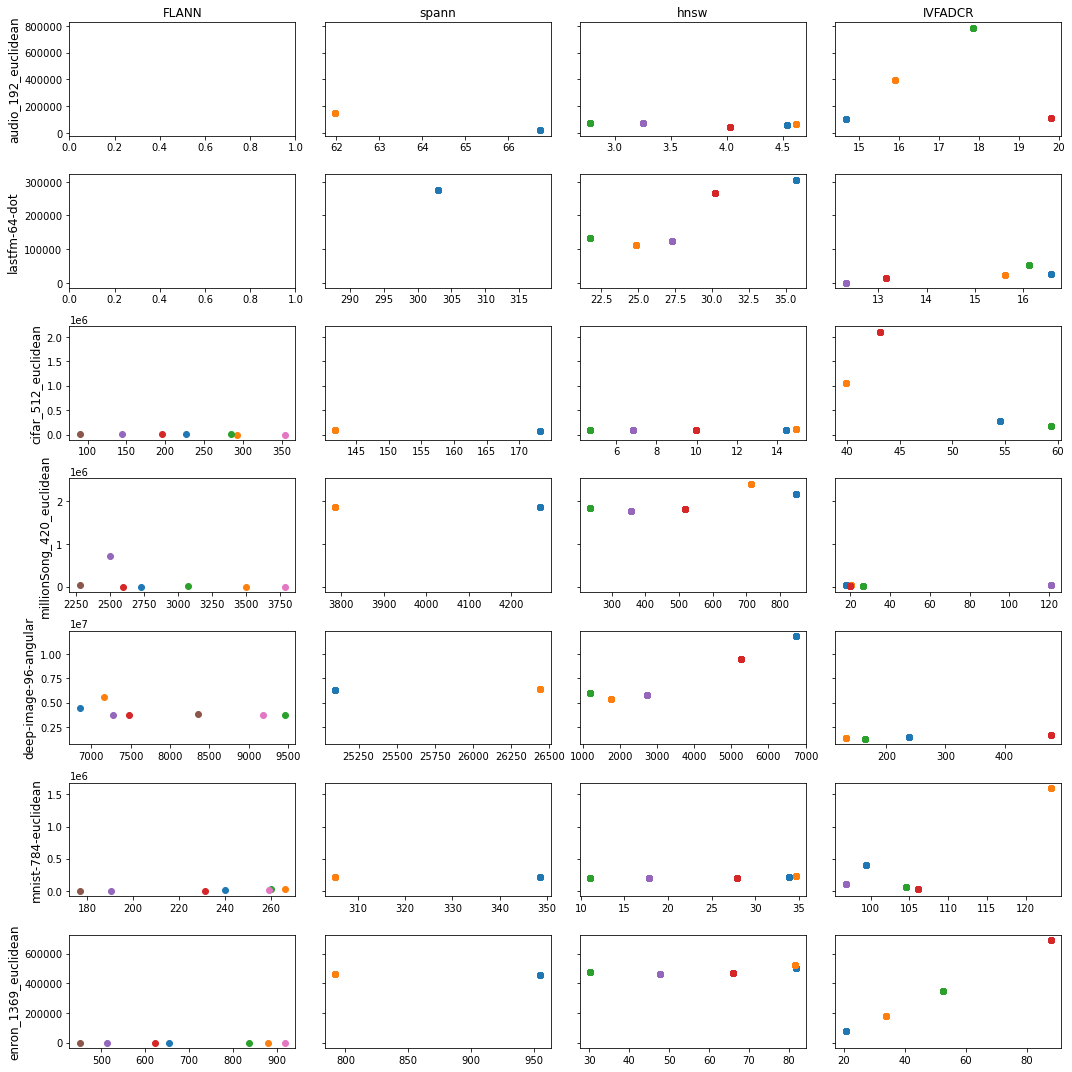

In [18]:
fig, axes = plt.subplots(nrows=7, ncols=4, figsize=(15, 15), sharey='row')

with open('cache2.pickle', 'rb') as f:
    results = pickle.load(f)
    
results_list = list(results.keys())


for i, ds in enumerate(datasets[:7]):
    for j, algo in enumerate(algorithms):
        settings = find_strings_with_substring(results_list, algo+ds)
        plot_graph_ts(settings, results, axes[i, j])

for ax, col in zip(axes[0], algorithms):
    ax.set_title(col)

for ax, row in zip(axes[:,0], datasets[:7]):
    ax.set_ylabel(row, rotation=90, size='large')        
        

plt.tight_layout()
plt.show()

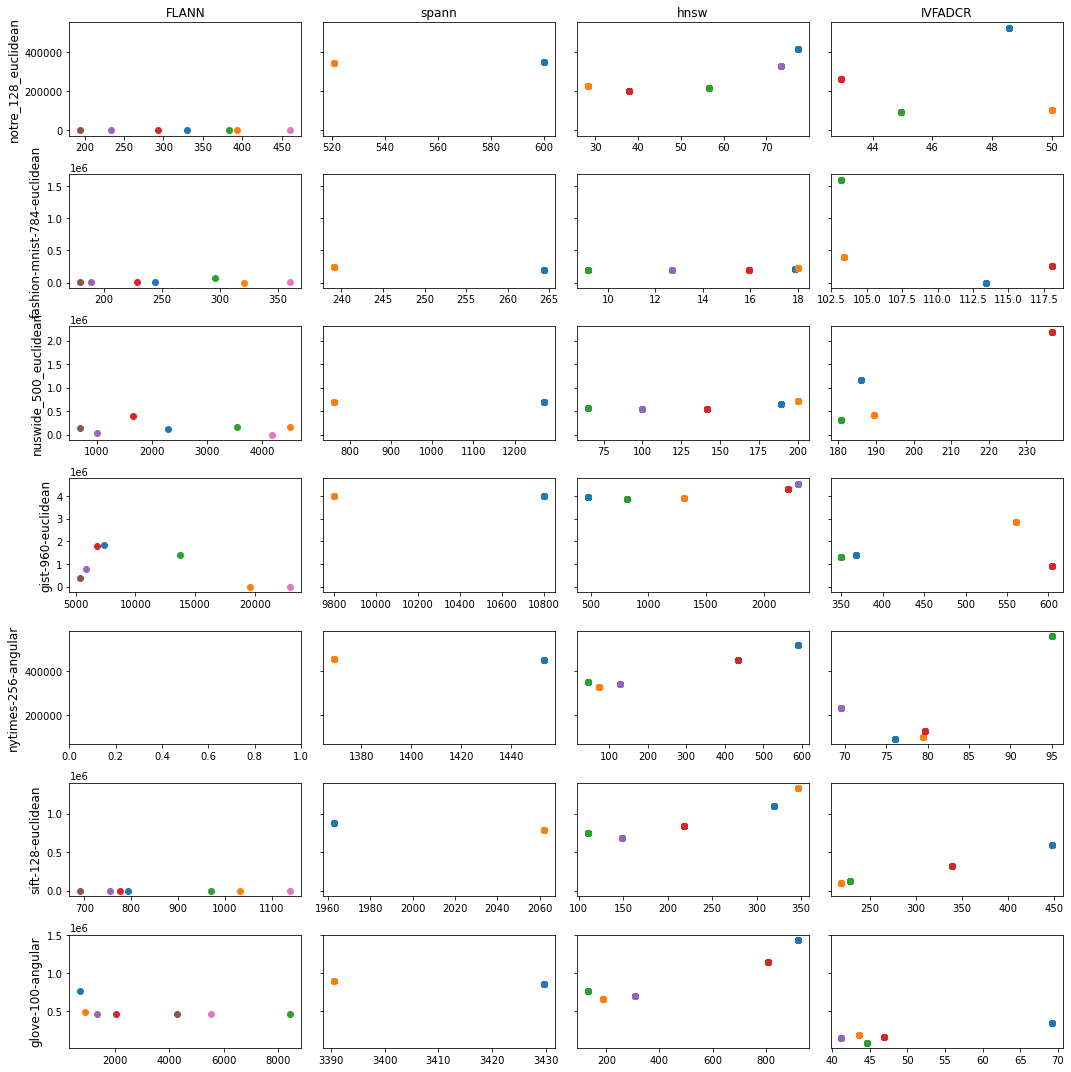

In [77]:
fig, axes = plt.subplots(nrows=7, ncols=4, figsize=(15, 15), sharey='row')

with open('cache2.pickle', 'rb') as f:
    results = pickle.load(f)
    
results_list = list(results.keys())


for i, ds in enumerate(datasets[7:14]):
    for j, algo in enumerate(algorithms):
        settings = find_strings_with_substring(results_list, algo+ds)
        plot_graph_ts(settings, results, axes[i, j])

for ax, col in zip(axes[0], algorithms):
    ax.set_title(col)

for ax, row in zip(axes[:,0], datasets[7:14]):
    ax.set_ylabel(row, rotation=90, size='large')        
        

plt.tight_layout()
plt.show()

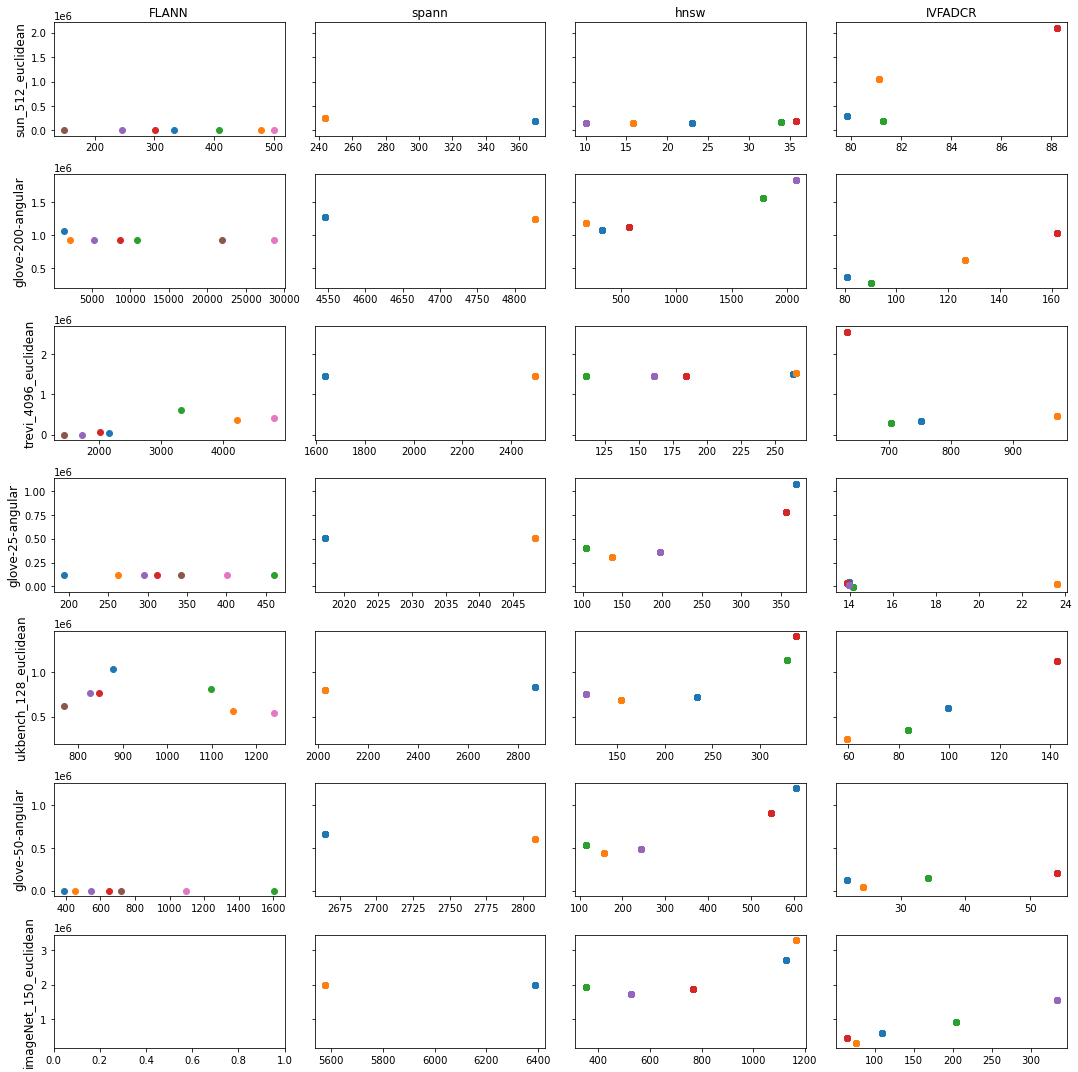

In [20]:
fig, axes = plt.subplots(nrows=7, ncols=4, figsize=(15, 15), sharey='row')

with open('cache2.pickle', 'rb') as f:
    results = pickle.load(f)
    
results_list = list(results.keys())


for i, ds in enumerate(datasets[14:]):
    for j, algo in enumerate(algorithms):
        settings = find_strings_with_substring(results_list, algo+ds)
        plot_graph_ts(settings, results, axes[i, j])

for ax, col in zip(axes[0], algorithms):
    ax.set_title(col)

for ax, row in zip(axes[:,0], datasets[14:]):
    ax.set_ylabel(row, rotation=90, size='large')        
        

plt.tight_layout()
plt.show()

# Index size and time different datasets

In [35]:

def find_strings_with_substring(str_list, substr):
    return [s for s in str_list if substr in s]

In [36]:
def get_min_size(settings, results, threshold):
    high_recall = []
    for setting in settings:
        for x, y, _, size, _ in results[setting]:
            if x >= threshold:
                high_recall.append(size)
        
    high_recall = [x for x in high_recall if x > 0]
    
    return min(high_recall) if high_recall else -1

In [37]:
def get_min_time(settings, results, threshold):
    high_recall = []
    for setting in settings:
        for x, y, time, _, _ in results[setting]:
            if x >= threshold:
                high_recall.append(time)
        
    return min(high_recall) if high_recall else -1

{'FLANN': [[0.0, 2408.0, 0.0, 0.0, 0.0, 0.0, 0.0], [61448.0, 129912.0, 117872.0, 130056.0, 203524.0, 350652.0, 350772.0], [5752.0, 0.0, 1008.0, 21192.0, 11768.0, 15188.0, 0.0], [12.0, 936.0, 2752.0, 8.0, 711092.0, 26792.0, 4.0], [4453640.0, 5550628.0, 3745608.0, 3746252.0, 3748340.0, 3850952.0, 3746244.0], [6792.0, 35184.0, 35708.0, 2668.0, 4164.0, 3908.0, 5940.0, 6468.0, 0.0, 64120.0, 3772.0, 3720.0, 4156.0, 10024.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [6468.0, 0.0, 64120.0, 3772.0, 3720.0, 4156.0, 10024.0], [126364.0, 155640.0, 155648.0, 391500.0, 23316.0, 138324.0, 0.0], [1819908.0, -20.0, 1403460.0, 1785688.0, 793124.0, 392628.0, 0.0], [], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [761072.0, 488252.0, 462312.0, 462312.0, 464064.0, 462312.0, 462312.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1059768.0, 924624.0, 924624.0, 924624.0, 924624.0, 924492.0, 924216.0], [37464.0, 351576.0, 597984.0, 64924.0, 0.0, 0.0, 398356.0], [115580.0, 115580.0, 115580.0,

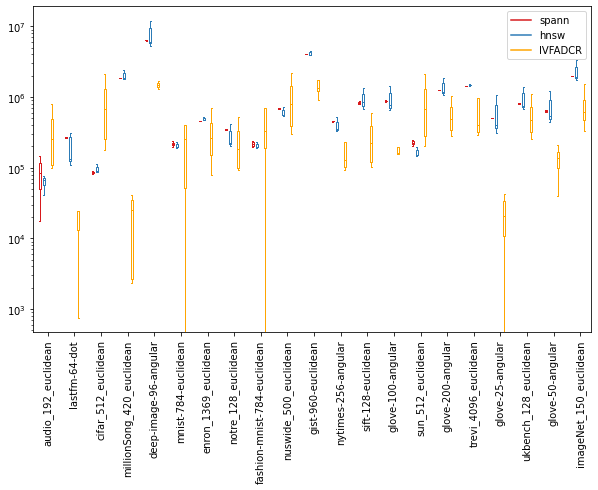

In [ ]:


    
#results_list = list(results.keys())

algo_result = {}

for i, ds in enumerate(datasets):
    
    data_settings = results[ds]
    
    
    for j, algo in enumerate(algorithms): 
        algo_settings = find_strings_with_substring(data_settings, algo)
        
        data_to_plot = []
        
        for algo_setting in algo_settings:
            
            data_to_plot.append(results[algo_setting][0][1])
            
        algo_result.setdefault(algo, []).append(data_to_plot)

#print(algo_result)


def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

plt.figure(figsize = (10, 6))

bpl = plt.boxplot(algo_result['spann'], positions=np.array(range(len(algo_result['spann'])))*2.0-0.6, sym='', widths=0.15)
bpr = plt.boxplot(algo_result['hnsw'], positions=np.array(range(len(algo_result['hnsw'])))*2.0-0.3, sym='', widths=0.15)
bpc = plt.boxplot(algo_result['IVFADCR'], positions=np.array(range(len(algo_result['IVFADCR'])))*2.0+0.3, sym='', widths=0.15)
bpd = plt.boxplot(algo_result['FLANN'], positions=np.array(range(len(algo_result['FLANN'])))*2.0+0.6, sym='', widths=0.15)
plt.yscale('log')

set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
set_box_color(bpr, '#2C7BB6')
set_box_color(bpc, '#FFA500')
set_box_color(bpd, '#008000')


plt.plot([], c='#D7191C', label='spann')
plt.plot([], c='#2C7BB6', label='hnsw')
plt.plot([], c='#FFA500', label='IVFADCR')
#plt.plot([], c='#008000', label='FLANN')
plt.legend()

plt.xticks(range(0, len(datasets) * 2, 2), datasets, rotation = 90);

/tmp/ipykernel_166/2296890157.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right')


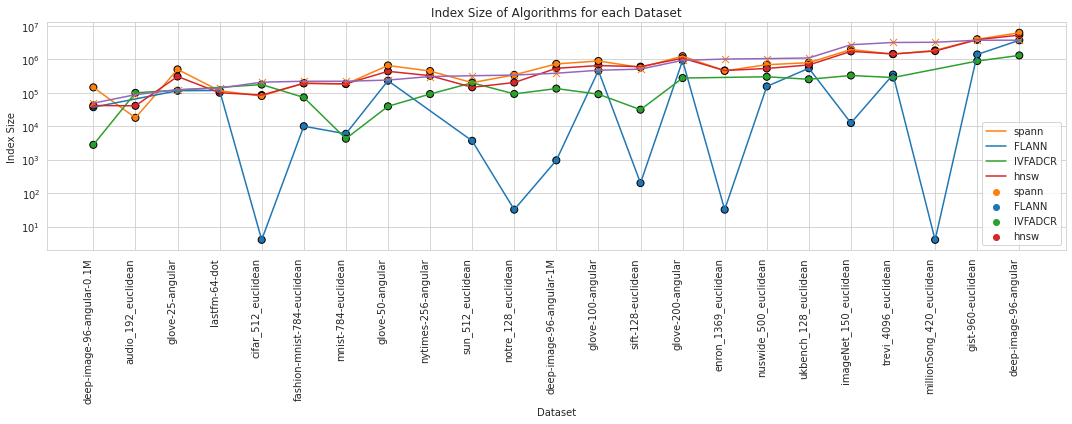

In [39]:
import seaborn as sns

with open('cache.pickle', 'rb') as f:
    results = pickle.load(f)

algorithms = [
    "FLANN",
    "spann",
    "hnsw",
    "IVFADCR"
]
    
# Reshape the data into a long format
df_long = pd.DataFrame()
for algo in algorithms:
    for i, ds in enumerate(datasets):
        data_settings = list(results[ds].keys())
        algo_settings = find_strings_with_substring(data_settings, algo)
        
        min_size = get_min_size(algo_settings, results[ds], 0.8)
        
        #print(algo, ds, min_size)
        if min_size > 0:
            df_temp = pd.DataFrame({'Algorithm': algo, 'Dataset': ds, 'Index size': min_size}, index=[0])
            df_long = pd.concat([df_long, df_temp])



# Change the 'Dataset' column to a categorical data type with the specified order
df_long['Dataset'] = pd.Categorical(df_long['Dataset'], categories=sorted_datasets_size, ordered=True)

# Sort the DataFrame based on the new order
df_long = df_long.sort_values('Dataset')            
            

# Create the plot using Seaborn
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(x='Dataset', y='Index size', hue='Algorithm', data=df_long, palette=color_settings)
sns.scatterplot(x='Dataset', y='Index size', hue='Algorithm', data=df_long, s=50, marker='o', edgecolor='k', linewidth=1, palette=color_settings)

sorted_df_cp = sorted_df.copy()
sorted_df_cp['Size'] = sorted_df_cp['Size'] * 1024
sns.lineplot(x='Dataset', y='Size', data=sorted_df_cp)
sns.scatterplot(x='Dataset', y='Size', data=sorted_df_cp, s=50, marker='x', linewidth=1)

plt.yscale('log')

# Rotate the x-axis tick labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right')

# Add axis labels and title
plt.xlabel('Dataset')
plt.ylabel('Index Size')
plt.title('Index Size of Algorithms for each Dataset')


# Adjust padding
fig.tight_layout()

# Show the plot
plt.show()
fig.savefig('Index Size plot.png')

/tmp/ipykernel_261/4232763754.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right')


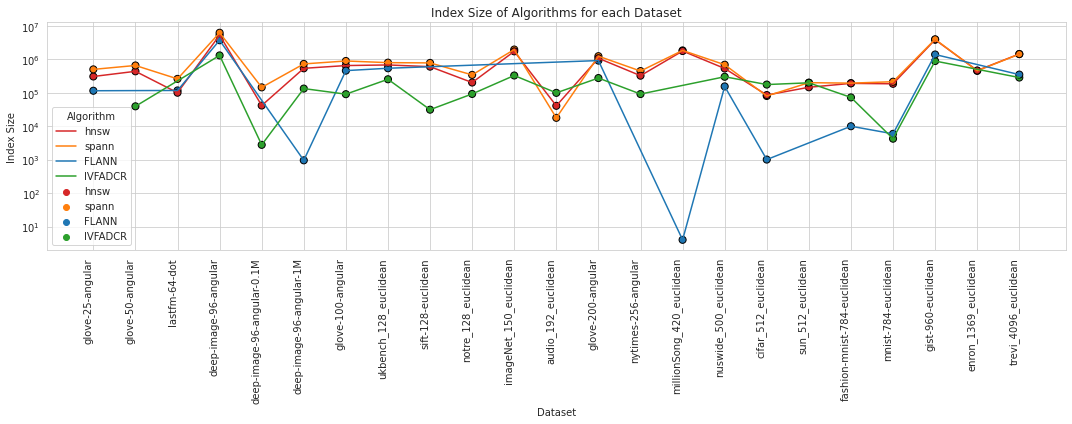

In [38]:
import seaborn as sns

with open('cache.pickle', 'rb') as f:
    results = pickle.load(f)

algorithms = [
    "FLANN",
    "spann",
    "hnsw",
    "IVFADCR"
]
    
# Reshape the data into a long format
df_long = pd.DataFrame()
for algo in algorithms:
    for i, ds in enumerate(datasets):
        data_settings = list(results[ds].keys())
        algo_settings = find_strings_with_substring(data_settings, algo)
        
        min_size = get_min_size(algo_settings, results[ds], 0.8)
        
        #print(algo, ds, min_size)
        if min_size > 0:
            df_temp = pd.DataFrame({'Algorithm': algo, 'Dataset': ds, 'Index size': min_size}, index=[0])
            df_long = pd.concat([df_long, df_temp])



# Change the 'Dataset' column to a categorical data type with the specified order
df_long['Dataset'] = pd.Categorical(df_long['Dataset'], categories=sorted_datasets_dim, ordered=True)

# Sort the DataFrame based on the new order
df_long = df_long.sort_values('Dataset')            
            

# Create the plot using Seaborn
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(x='Dataset', y='Index size', hue='Algorithm', data=df_long, palette=color_settings)
sns.scatterplot(x='Dataset', y='Index size', hue='Algorithm', data=df_long, s=50, marker='o', edgecolor='k', linewidth=1, palette=color_settings)
plt.yscale('log')

# Rotate the x-axis tick labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right')

# Add axis labels and title
plt.xlabel('Dataset')
plt.ylabel('Index Size')
plt.title('Index Size of Algorithms for each Dataset')


# Adjust padding
fig.tight_layout()

# Show the plot
plt.show()
fig.savefig('Index Size plot.png')

  Algorithm            Dataset  Index size
0     FLANN   glove-25-angular    115580.0
0     spann   glove-25-angular    503420.0
0      hnsw   glove-25-angular    308540.0
0     FLANN   glove-50-angular    231196.0
0     spann   glove-50-angular    659160.0
0      hnsw   glove-50-angular    440796.0
0   IVFADCR   glove-50-angular     39504.0
0     FLANN  glove-100-angular    462312.0
0     spann  glove-100-angular    898200.0
0      hnsw  glove-100-angular    655344.0
0   IVFADCR  glove-100-angular     91196.0
0     FLANN  glove-200-angular    924216.0
0     spann  glove-200-angular   1250060.0
0      hnsw  glove-200-angular   1084808.0
0   IVFADCR  glove-200-angular    277132.0


/tmp/ipykernel_166/3090787593.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right')


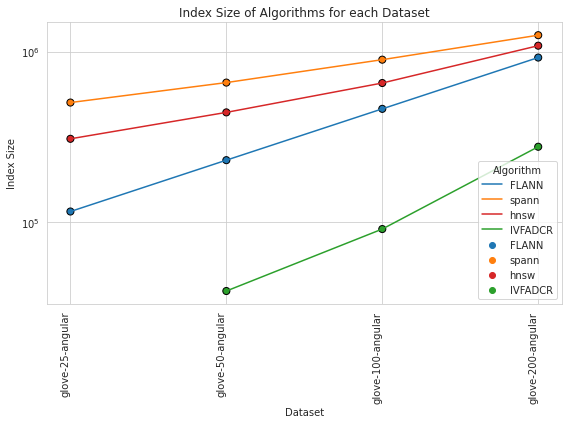

In [42]:
import seaborn as sns

glove_datasets = ['glove-25-angular', 'glove-50-angular', 'glove-100-angular', 'glove-200-angular']


with open('cache.pickle', 'rb') as f:
    results = pickle.load(f)

algorithms = [
    "FLANN",
    "spann",
    "hnsw",
    "IVFADCR"
]
    
# Reshape the data into a long format
df_long = pd.DataFrame()
for algo in algorithms:
    for i, ds in enumerate(glove_datasets):
        data_settings = list(results[ds].keys())
        algo_settings = find_strings_with_substring(data_settings, algo)
        
        min_size = get_min_size(algo_settings, results[ds], 0.8)
        
        #print(algo, ds, min_size)
        if min_size > 0:
            df_temp = pd.DataFrame({'Algorithm': algo, 'Dataset': ds, 'Index size': min_size}, index=[0])
            df_long = pd.concat([df_long, df_temp])



# Change the 'Dataset' column to a categorical data type with the specified order
df_long['Dataset'] = pd.Categorical(df_long['Dataset'], categories=glove_datasets, ordered=True)

# Sort the DataFrame based on the new order
df_long = df_long.sort_values('Dataset')            

print(df_long)

# Create the plot using Seaborn
fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(x='Dataset', y='Index size', hue='Algorithm', data=df_long, palette=color_settings)
sns.scatterplot(x='Dataset', y='Index size', hue='Algorithm', data=df_long, s=50, marker='o', edgecolor='k', linewidth=1, palette=color_settings)
plt.yscale('log')

# Rotate the x-axis tick labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right')

# Add axis labels and title
plt.xlabel('Dataset')
plt.ylabel('Index Size')
plt.title('Index Size of Algorithms for each Dataset')


# Adjust padding
fig.tight_layout()

# Show the plot
plt.show()
fig.savefig('Index Size plot.png')

/tmp/ipykernel_166/4113853063.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right')


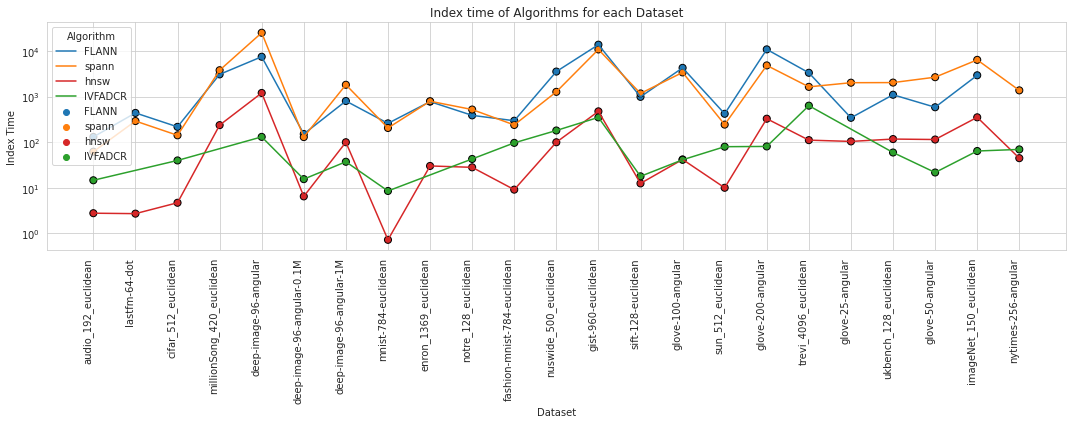

In [44]:
import seaborn as sns

with open('cache.pickle', 'rb') as f:
    results = pickle.load(f)

algorithms = [
    "FLANN",
    "spann",
    "hnsw",
    "IVFADCR"
]
    
# Reshape the data into a long format
df_long = pd.DataFrame()
for algo in algorithms:
    for i, ds in enumerate(datasets):
        data_settings = list(results[ds].keys())
        algo_settings = find_strings_with_substring(data_settings, algo)
        
        min_time = get_min_time(algo_settings, results[ds], 0.8)
        
        #print(algo, ds, min_time)
        if min_time > 0:
            df_temp = pd.DataFrame({'Algorithm': algo, 'Dataset': ds, 'Index time': min_time}, index=[0])
            df_long = pd.concat([df_long, df_temp])

# Change the 'Dataset' column to a categorical data type with the specified order
#df_long['Dataset'] = pd.Categorical(df_long['Dataset'], categories=sorted_datasets_size, ordered=True)

# Sort the DataFrame based on the new order
#df_long = df_long.sort_values('Dataset')    
            
# Create the plot using Seaborn
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(x='Dataset', y='Index time', hue='Algorithm', data=df_long, palette=color_settings)
sns.scatterplot(x='Dataset', y='Index time', hue='Algorithm', data=df_long, s=50, marker='o', edgecolor='k', linewidth=1, palette=color_settings)
plt.yscale('log')

# Rotate the x-axis tick labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right')

# Add axis labels and title
plt.xlabel('Dataset')
plt.ylabel('Index Time')
plt.title('Index time of Algorithms for each Dataset')

# Adjust padding
fig.tight_layout()

# Show the plot
plt.show()
fig.savefig('Index time plot.png')

In [45]:
glove_datasets = ['glove-25-angular', 'glove-50-angular', 'glove-100-angular', 'glove-200-angular']

In [46]:
deep_datasets = [
    "deep-image-96-angular-0.1M", 
                
    "deep-image-96-angular-1M",
"deep-image-96-angular"]

/tmp/ipykernel_166/398562530.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right')


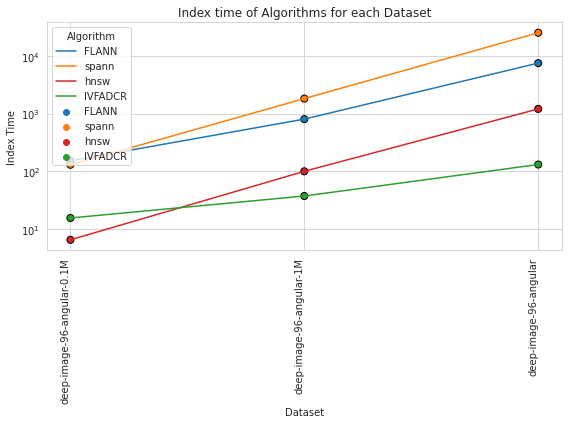

In [48]:
import seaborn as sns

with open('cache.pickle', 'rb') as f:
    results = pickle.load(f)

algorithms = [
    "FLANN",
    "spann",
    "hnsw",
    "IVFADCR"
]
    
# Reshape the data into a long format
df_long = pd.DataFrame()
for algo in algorithms:
    for i, ds in enumerate(deep_datasets):
        data_settings = list(results[ds].keys())
        algo_settings = find_strings_with_substring(data_settings, algo)
        
        min_time = get_min_time(algo_settings, results[ds], 0.8)
        
        #print(algo, ds, min_time)
        if min_time > 0:
            df_temp = pd.DataFrame({'Algorithm': algo, 'Dataset': ds, 'Index time': min_time}, index=[0])
            df_long = pd.concat([df_long, df_temp])

# Change the 'Dataset' column to a categorical data type with the specified order
df_long['Dataset'] = pd.Categorical(df_long['Dataset'], categories=deep_datasets, ordered=True)

# Sort the DataFrame based on the new order
df_long = df_long.sort_values('Dataset')    
            
# Create the plot using Seaborn
fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(x='Dataset', y='Index time', hue='Algorithm', data=df_long, palette=color_settings)
sns.scatterplot(x='Dataset', y='Index time', hue='Algorithm', data=df_long, s=50, marker='o', edgecolor='k', linewidth=1, palette=color_settings)
plt.yscale('log')

# Rotate the x-axis tick labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right')

# Add axis labels and title
plt.xlabel('Dataset')
plt.ylabel('Index Time')
plt.title('Index time of Algorithms for each Dataset')

# Adjust padding
fig.tight_layout()

# Show the plot
plt.show()
fig.savefig('Index time plot.png')

/tmp/ipykernel_166/4270964648.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right')


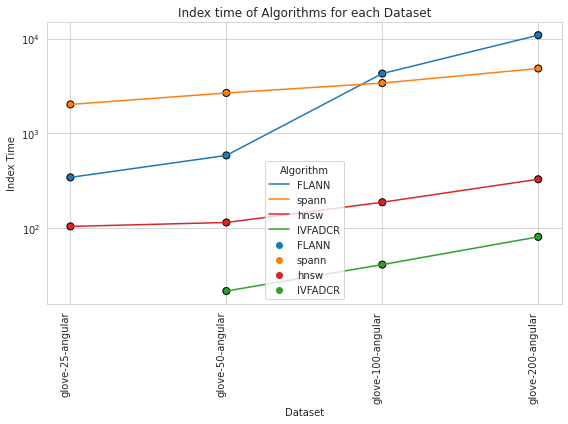

In [49]:
import seaborn as sns

with open('cache.pickle', 'rb') as f:
    results = pickle.load(f)

algorithms = [
    "FLANN",
    "spann",
    "hnsw",
    "IVFADCR"
]
    
# Reshape the data into a long format
df_long = pd.DataFrame()
for algo in algorithms:
    for i, ds in enumerate(glove_datasets):
        data_settings = list(results[ds].keys())
        algo_settings = find_strings_with_substring(data_settings, algo)
        
        min_time = get_min_time(algo_settings, results[ds], 0.8)
        
        #print(algo, ds, min_time)
        if min_time > 0:
            df_temp = pd.DataFrame({'Algorithm': algo, 'Dataset': ds, 'Index time': min_time}, index=[0])
            df_long = pd.concat([df_long, df_temp])

# Change the 'Dataset' column to a categorical data type with the specified order
df_long['Dataset'] = pd.Categorical(df_long['Dataset'], categories=glove_datasets, ordered=True)

# Sort the DataFrame based on the new order
df_long = df_long.sort_values('Dataset')    

df_long = df_long.reset_index(drop=True)
row_index = df_long.loc[(df_long['Algorithm'] == 'hnsw') & (df_long['Dataset'] == 'glove-100-angular')].index[0]
df_long.loc[row_index, 'Index time'] = 187.4452486

            
# Create the plot using Seaborn
fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(x='Dataset', y='Index time', hue='Algorithm', data=df_long, palette=color_settings)
sns.scatterplot(x='Dataset', y='Index time', hue='Algorithm', data=df_long, s=50, marker='o', edgecolor='k', linewidth=1, palette=color_settings)
plt.yscale('log')

# Rotate the x-axis tick labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right')

# Add axis labels and title
plt.xlabel('Dataset')
plt.ylabel('Index Time')
plt.title('Index time of Algorithms for each Dataset')

# Adjust padding
fig.tight_layout()

# Show the plot
plt.show()
fig.savefig('Index time plot.png')

# Query time

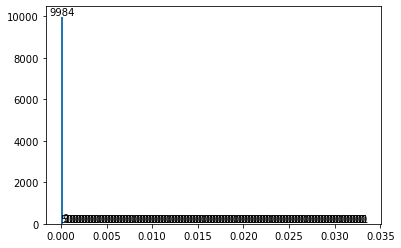

In [23]:
for algo_n_settings in all_results.keys():
    if 'ef_construction' in algo_n_settings:
        ys = [y for y, _ in all_results[algo_n_settings]]
        counts, edges, bars =  plt.hist(ys[0], bins=200)
        plt.bar_label(bars)
        break

In [45]:
def calculate(path, dataset_name, count = 3):
    
    results = load_all_results(dataset_name, count)

    dataset, _ = get_ds(path, dataset_name)
    true_nn_distances = np.array(dataset["distances"])

    all_results = {}
    for i, (properties, run, fn, building_arguments) in enumerate(results):
        algo_name = properties['algo']
        #building_arguments = properties['building_arguments']
        #algo_name = properties['name']
       
        run_distances = np.array(run['distances'])
        
        build_time = properties['build_time']
        index_size = properties['index_size']
        
        times = np.array(run['times'])

        #metrics_cache = get_or_create_metrics(run)

        x_axis = fn_metrics['recall'](
            true_nn_distances,
            run_distances, times, properties)
        y_axis = fn_metrics['qps'](
            true_nn_distances,
            run_distances, times, properties)

        print('%3d: %80s %12.3f %12.3f %12.3f %12.3f' %
              (i, algo_name, x_axis, y_axis, build_time, index_size))

        all_results.setdefault(algo_name + '_' + building_arguments, []).append(
            (x_axis, y_axis, build_time, index_size, times, fn))
    
    return all_results

In [46]:
time_results = calculate('data', 'glove-100-angular')

  0:                                                                            FLANN        0.148     3806.827      709.883   761072.000
  1:                                                                            FLANN        0.450     2072.379      883.519   488252.000
  2:                                                                            FLANN        0.972       29.877     8460.085   462312.000
  3:                                                                            FLANN        0.775      374.372     2045.821   462312.000
  4:                                                                            FLANN        0.691      763.451     1322.413   464064.000
  5:                                                                            FLANN        0.878      143.098     4268.485   462312.000
  6:                                                                            FLANN        0.945       53.546     5544.069   462312.000
  7:                              

In [56]:
time_results.keys()

dict_keys(['FLANN_metric_angular_target_precision_0_2', 'FLANN_metric_angular_target_precision_0_5', 'FLANN_metric_angular_target_precision_0_97', 'FLANN_metric_angular_target_precision_0_8', 'FLANN_metric_angular_target_precision_0_7', 'FLANN_metric_angular_target_precision_0_9', 'FLANN_metric_angular_target_precision_0_95', 'spann_metric_angular_mode_KDT', 'spann_metric_angular_mode_BKT', 'IVFADCR_M_25_M_refine_25_metric_angular_n_lists_512_nbits_8_nbits_refine_8', 'IVFADCR_M_50_M_refine_50_metric_angular_n_lists_4096_nbits_8_nbits_refine_8', 'IVFADCR_M_50_M_refine_50_metric_angular_n_lists_1024_nbits_8_nbits_refine_8', 'IVFADCR_M_50_M_refine_50_metric_angular_n_lists_256_nbits_4_nbits_refine_4', 'IVFADCR_M_25_M_refine_25_metric_angular_n_lists_1024_nbits_8_nbits_refine_8', 'IVFADCR_M_25_M_refine_25_metric_angular_n_lists_4096_nbits_8_nbits_refine_8', 'IVFADCR_M_50_M_refine_50_metric_angular_n_lists_64_nbits_8_nbits_refine_8', 'IVFADCR_M_50_M_refine_50_metric_angular_n_lists_20_nbits

In [59]:
query_time = time_results['FLANN_metric_angular_target_precision_0_95'][0][4]

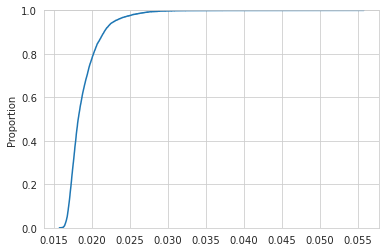

In [61]:
for i in range(len(time_results['FLANN_metric_angular_target_precision_0_95'])):
    query_time = time_results['FLANN_metric_angular_target_precision_0_95'][i][4]
    sns.ecdfplot(query_time)

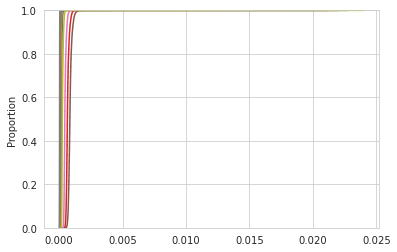

In [57]:
for i in range(len(time_results['hnsw_M_4_ef_construction_100_metric_angular'])):
    query_time = time_results['hnsw_M_4_ef_construction_100_metric_angular'][i][4]
    sns.ecdfplot(query_time)

In [ ]:
for i in range(len(time_results['hnsw_M_4_ef_construction_100_metric_angular'])):
    query_time = time_results['hnsw_M_4_ef_construction_100_metric_angular'][i][4]
    sns.ecdfplot(query_time)

# Building vs Searching parameters

In [51]:
selected_datasets = [
    #"audio_192_euclidean",
    "lastfm-64-dot",
    #"cifar_512_euclidean",
    #"millionSong_420_euclidean",
    #"deep-image-96-angular",
    #"deep-image-96-angular-0.1M",
    ##"deep-image-96-angular-1M",
    "mnist-784-euclidean",
    #"enron_1369_euclidean",
    #"notre_128_euclidean",
    #"fashion-mnist-784-euclidean",
    #"nuswide_500_euclidean",
    #"gist-960-euclidean",
    #"nytimes-256-angular",
    "sift-128-euclidean",
    "glove-100-angular",
    #"sun_512_euclidean",
    #"glove-200-angular",
    #"trevi_4096_euclidean",
    #"glove-25-angular",
    #"ukbench_128_euclidean",
    #"glove-50-angular",
    #"imageNet_150_euclidean"
]

In [86]:
def cache(path, datasets, count):
    if os.path.exists(f'cache_{count}.pickle'):
        os.remove(f'cache_{count}.pickle')
        
    
    results_to_store = {}

    for ds in datasets:
        all_results = calculate(path, ds, count)
        results_to_store[ds] = all_results


    # cache the dictionary to a file
    with open(f'cache_{count}.pickle', 'wb') as f:
        pickle.dump(results_to_store, f)



In [87]:
def calculate(path, dataset_name, count = 3):
    
    results = load_all_results(dataset_name, count)

    dataset, _ = get_ds(path, dataset_name)
    true_nn_distances = np.array(dataset["distances"])

    all_results = {}
    for i, (properties, run, fn, building_arguments) in enumerate(results):
        algo_name = properties['algo']
        #building_arguments = properties['building_arguments']
        #algo_name = properties['name']
       
        run_distances = np.array(run['distances'])
        
        build_time = properties['build_time']
        index_size = properties['index_size']
        
        times = np.array(run['times'])

        #metrics_cache = get_or_create_metrics(run)

        x_axis = fn_metrics['recall'](
            true_nn_distances,
            run_distances, times, properties)
        y_axis = fn_metrics['qps'](
            true_nn_distances,
            run_distances, times, properties)

        print('%3d: %80s %12.3f %12.3f %12.3f %12.3f' %
              (i, algo_name, x_axis, y_axis, build_time, index_size))

        all_results.setdefault(algo_name + '_' + building_arguments, []).append(
            (x_axis, y_axis, build_time, index_size, fn))
    
    return all_results



In [88]:
cache('data', selected_datasets, count = 10)

  0:                                                                            FLANN        0.014     4350.441      109.372    61372.000
  1:                                                                            FLANN        0.069     3763.491      151.210   129912.000
  2:                                                                            FLANN        0.566      614.438      253.801   180616.000
  3:                                                                            FLANN        0.252     2293.740      216.235   350604.000
  4:                                                                            FLANN        0.132     3063.006      191.492   203524.000
  5:                                                                            FLANN        0.337     1452.193      227.135   350692.000
  6:                                                                            FLANN        0.956     1240.409      360.009   117636.000
  7:                              

In [52]:

def plot_graph_s(settings, results, ax, algo):


    for setting in settings:
        x = [x for x, y, _,_,_ in results[setting]]
        y = [y for x, y, _,_,_ in results[setting]]
        fn = [fn for _, _, _, _, fn in results[setting]]

        # Plot the original points and Pareto frontier points
        ax.plot(x, y, label=setting)
        ax.scatter(x, y) 
        ax.set_yscale('log')
        ax.set_xlabel("recall")
        ax.set_ylabel("query per seconds")
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
        



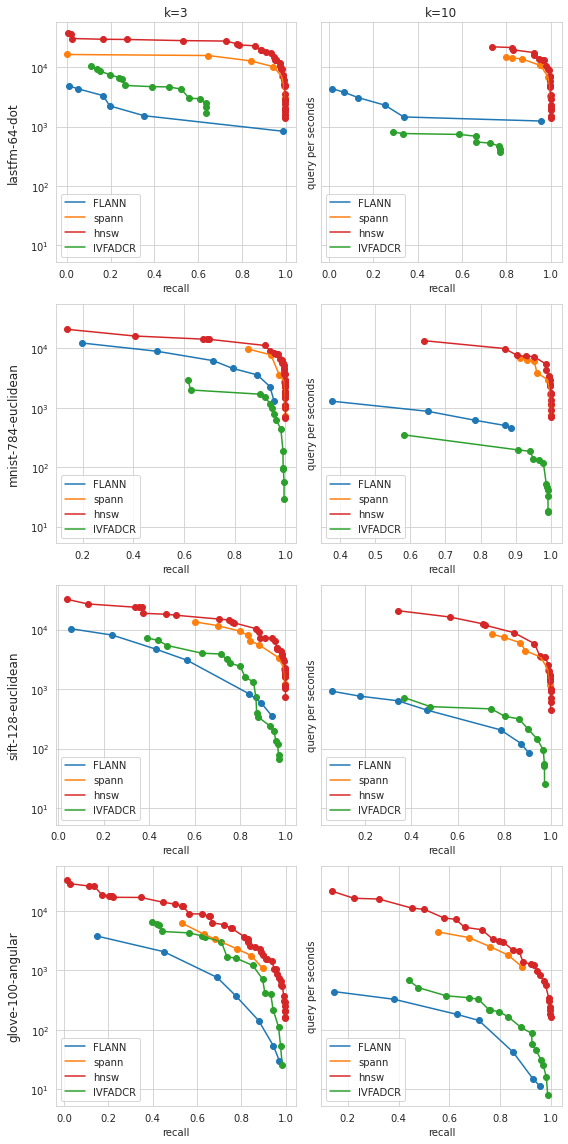

In [101]:
fig, axes = plt.subplots(nrows = 4, ncols=2, figsize=(8, 16), sharey=True)



with open('cache.pickle', 'rb') as f:
    results = pickle.load(f)

for i, ds in enumerate(selected_datasets):
    for j, algo in enumerate(algorithms):
        
        algo_list = list(results[ds].keys())

        settings = find_strings_with_substring(algo_list, algo)
        
        plot_graph(settings, results[ds], axes[i, 0], algo)
        #axes[i, j].set_title(ds)

with open('cache_10.pickle', 'rb') as f:
    results = pickle.load(f)

for i, ds in enumerate(selected_datasets):
    for j, algo in enumerate(algorithms):
        
        algo_list = list(results[ds].keys())

        settings = find_strings_with_substring(algo_list, algo)
        
        plot_graph(settings, results[ds], axes[i, 1], algo)
        #axes[i, j].set_title(ds)
        

# Column names
col_names = ['k=3', 'k=10']


# Row names
row_names = selected_datasets

# Set column names as supertitles for the first row
for ax, col_name in zip(axes[0], col_names):
    ax.set_title(col_name)

# Set row names as y-axis labels for the first column
for ax, row_name in zip(axes[:, 0], row_names):
    ax.set_ylabel(row_name, rotation=90, size='large', labelpad=10)

plt.tight_layout()
plt.show()

fig.savefig('k_difference.png')


In [102]:
fig.savefig('k_difference.png')

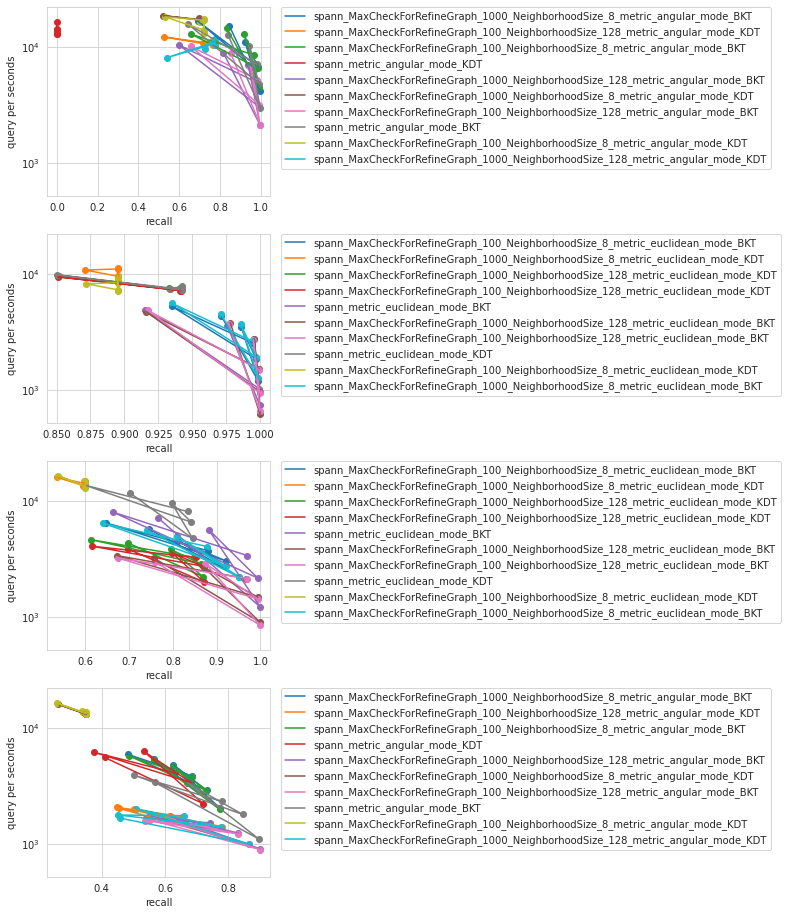

In [63]:
fig, axes = plt.subplots(nrows = 4, ncols=1, figsize=(4, 16), sharey=True)

with open('cache.pickle', 'rb') as f:
    results = pickle.load(f)


    
algo = 'spann'


parameter_names = ['MaxCheckForRefineGraph', 'NeighborhoodSize', 'metric', 'mode']



for i, ds in enumerate(selected_datasets):
        
    algo_list = list(results[ds].keys())

    settings = find_strings_with_substring(algo_list, algo)
    
    

    plot_graph_s(settings, results[ds], axes[i], algo)
    #axes[i, j].set_title(ds)

spann_metric_angular_mode_KDT
spann_metric_angular_mode_KDT
spann_MaxCheckForRefineGraph_10000_NeighborhoodSize_32_metric_angular_mode_KDT
spann_metric_angular_mode_BKT
spann_metric_angular_mode_BKT
spann_MaxCheckForRefineGraph_10000_NeighborhoodSize_32_metric_angular_mode_BKT
spann_metric_euclidean_mode_BKT
spann_metric_euclidean_mode_BKT
spann_MaxCheckForRefineGraph_10000_NeighborhoodSize_32_metric_euclidean_mode_BKT
spann_metric_euclidean_mode_KDT
spann_metric_euclidean_mode_KDT
spann_MaxCheckForRefineGraph_10000_NeighborhoodSize_32_metric_euclidean_mode_KDT
spann_metric_euclidean_mode_BKT
spann_metric_euclidean_mode_BKT
spann_MaxCheckForRefineGraph_10000_NeighborhoodSize_32_metric_euclidean_mode_BKT
spann_metric_euclidean_mode_KDT
spann_metric_euclidean_mode_KDT
spann_MaxCheckForRefineGraph_10000_NeighborhoodSize_32_metric_euclidean_mode_KDT
spann_metric_angular_mode_KDT
spann_metric_angular_mode_KDT
spann_MaxCheckForRefineGraph_10000_NeighborhoodSize_32_metric_angular_mode_KDT
spa

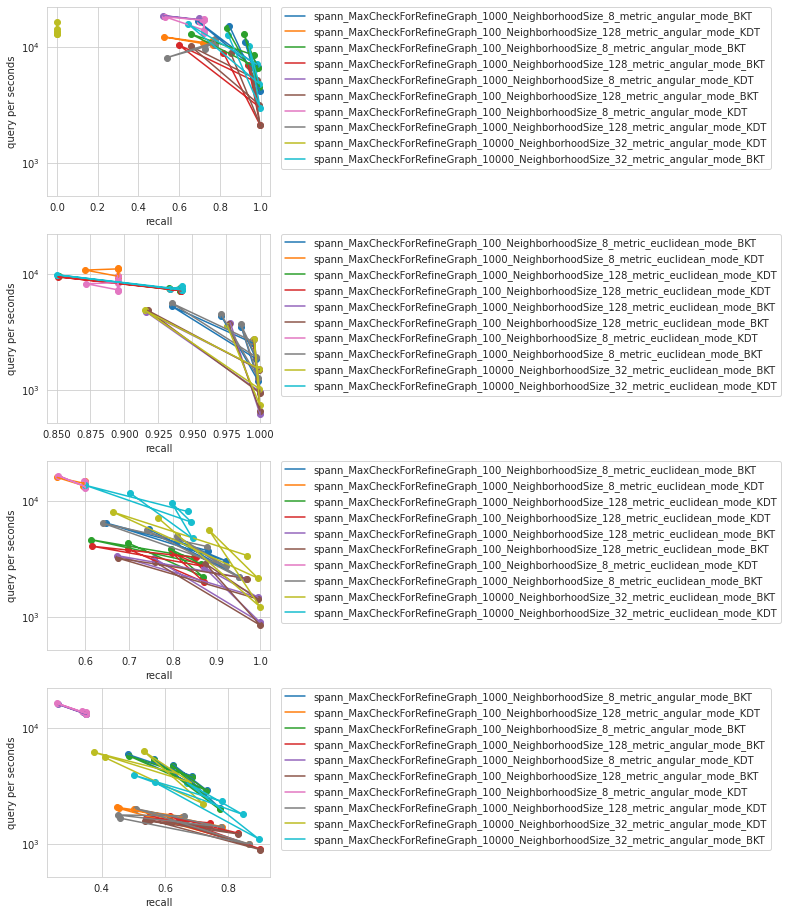

In [65]:
fig, axes = plt.subplots(nrows = 4, ncols=1, figsize=(4, 16), sharey=True)

with open('cache.pickle', 'rb') as f:
    results = pickle.load(f)

s_a = 'MaxCheckForRefineGraph_10000_NeighborhoodSize_32'


for i, ds in enumerate(selected_datasets):
        
    algo_list = list(results[ds].keys())

    settings = find_strings_with_substring(algo_list, algo)
    
    for setting in settings:
        if 'MaxCheckForRefineGraph' not in setting:
            print(setting)
            value = results[ds].pop(setting, None)
            if value is not None:
                print(setting)
                # Split s into two parts at the first underscore
                parts = setting.split('_', 1)

                # Insert s_a in between the parts
                new_s = f"{parts[0]}_{s_a}_{parts[1]}"
                print(new_s)
                results[ds][new_s] = value
    
algo = 'spann'


parameter_names = ['MaxCheckForRefineGraph', 'NeighborhoodSize', 'metric', 'mode']



for i, ds in enumerate(selected_datasets):
    
    algo_list = list(results[ds].keys())
    #print(algo_list)

    settings = find_strings_with_substring(algo_list, algo)
    
    

    plot_graph_s(settings, results[ds], axes[i], algo)
    #axes[i, j].set_title(ds)

In [66]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, SelectMultiple
import ipywidgets as widgets
from IPython.display import display
import re


    

def draw_interactive_graph(ds, results, algo, parameter_names):
    
    default_values = {
    'MaxCheckForRefineGraph': '10000',
    'NeighborhoodSize': '32'
    }

    algo_list = list(results[ds].keys())

    settings = find_strings_with_substring(algo_list, algo)

    # Example data (y-values) for each label
    data_y = {label: [y for x, y, _,_,_ in results[ds][label]] for label in settings}
    data_x = {label: [x for x, y, _,_,_ in results[ds][label]] for label in settings}

    def plot_lines(save = False, **kwargs):
        plt.figure(figsize=(10, 5))

        for label in settings:
            #print(kwargs)
            #print([f"{param}_{value}" in label for param, value in kwargs.items() for value in kwargs[param]])

            is_plotted = []
            for param, value in kwargs.items():
                temp = any([f"{param}_{value}" in label for value in kwargs[param]])
                is_plotted.append(temp)


            if all(is_plotted):
                sorted_pairs = sorted(zip(data_x[label], data_y[label]), key=lambda pair: pair[0])
                list_x_sorted, list_y_sorted = zip(*sorted_pairs)
                plt.plot(list_x_sorted, list_y_sorted, label=label)
                plt.scatter(list_x_sorted, list_y_sorted)

        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

        plt.yscale('log')
        plt.title(ds + ' ' + algo)
        plt.xlabel('recall')
        plt.ylabel('qps')

        if save:
            plt.savefig("output_plot.png", bbox_inches='tight')
        else:
            plt.show()

        


    # Extract unique parameter values from the labels list
    parameters = {param: set() for param in parameter_names}
    for label in settings:
        for param in parameter_names:
            match = re.search(f'{param}_([^_]+)', label)
            if match:
                value = match.group(1)
            else:
                value = default_values[param]
            parameters[param].add(value)

    # Create widgets for each parameter
    parameter_widgets = {param: SelectMultiple(options=sorted(list(values)), value=list(values), description=param, disabled=False,) for param, values in parameters.items()}
    
    
    # Create the interactive plot
    #interact(plot_lines, **parameter_widgets);
    
    # Add a button widget to save the plot
    save_button = widgets.Button(description="Save Plot")
    
    def on_save_button_click(button):
        plot_lines(save=True, **{param: w.value for param, w in widgets.items()})
    
    save_button.on_click(on_save_button_click)
    
    # Display the widgets and button
    display(interact(plot_lines, **parameter_widgets))
    display(save_button)

draw_interactive_graph(selected_datasets[0], results, algo, parameter_names)

interactive(children=(Checkbox(value=False, description='save'), SelectMultiple(description='MaxCheckForRefine…

<function __main__.draw_interactive_graph.<locals>.plot_lines(save=False, **kwargs)>

Button(description='Save Plot', style=ButtonStyle())

In [67]:
draw_interactive_graph(selected_datasets[1], results, algo, parameter_names)

interactive(children=(Checkbox(value=False, description='save'), SelectMultiple(description='MaxCheckForRefine…

<function __main__.draw_interactive_graph.<locals>.plot_lines(save=False, **kwargs)>

Button(description='Save Plot', style=ButtonStyle())

In [68]:
draw_interactive_graph(selected_datasets[2], results, algo, parameter_names)

interactive(children=(Checkbox(value=False, description='save'), SelectMultiple(description='MaxCheckForRefine…

<function __main__.draw_interactive_graph.<locals>.plot_lines(save=False, **kwargs)>

Button(description='Save Plot', style=ButtonStyle())

In [69]:
draw_interactive_graph(selected_datasets[3], results, algo, parameter_names)

interactive(children=(Checkbox(value=False, description='save'), SelectMultiple(description='MaxCheckForRefine…

<function __main__.draw_interactive_graph.<locals>.plot_lines(save=False, **kwargs)>

Button(description='Save Plot', style=ButtonStyle())

## Size and time

In [70]:

def draw_interactive_graph_size(ds, results, algo, parameter_names):

    algo_list = list(results[ds].keys())

    settings = find_strings_with_substring(algo_list, algo)

    # Example data (y-values) for each label
    

    def plot_lines(save = False, **kwargs):
        plt.figure(figsize=(10, 5))
        
        label_to_plot = []

        for label in settings:
            #print(kwargs)
            #print([f"{param}_{value}" in label for param, value in kwargs.items() for value in kwargs[param]])

            is_plotted = []
            for param, value in kwargs.items():
                temp = any([f"{param}_{value}" in label for value in kwargs[param]])
                is_plotted.append(temp)


            if all(is_plotted):
                label_to_plot.append(label)
                
        data = {}  
        data['settings'] = label_to_plot
        data['values'] = [results[ds][label][0][3] for label in label_to_plot]
                
        sns.barplot(x='settings', y='values', data = data)

        # Rotate x-axis labels by 90 degrees
        plt.xticks(rotation=90)

        #plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

        #plt.yscale('log')
        plt.title(ds + ' ' + algo)
        plt.ylabel('size')

        if save:
            plt.savefig("output_plot.png", bbox_inches='tight')
        else:
            plt.show()

        


    # Extract unique parameter values from the labels list
    parameters = {param: set() for param in parameter_names}
    for label in settings:
        for param in parameter_names:
            match = re.search(f'{param}_([^_]+)', label)
            if match:
                value = match.group(1)
                parameters[param].add(value)

    # Create widgets for each parameter
    parameter_widgets = {param: SelectMultiple(options=sorted(list(values)), value=list(values), description=param, disabled=False,) for param, values in parameters.items()}
    
    
    # Create the interactive plot
    #interact(plot_lines, **parameter_widgets);
    
    # Add a button widget to save the plot
    save_button = widgets.Button(description="Save Plot")
    
    def on_save_button_click(button):
        plot_lines(save=True, **{param: w.value for param, w in widgets.items()})
    
    save_button.on_click(on_save_button_click)
    
    # Display the widgets and button
    display(interact(plot_lines, **parameter_widgets))
    display(save_button)
    
    #print(data)

draw_interactive_graph_size(selected_datasets[0], results, algo, parameter_names)

interactive(children=(Checkbox(value=False, description='save'), SelectMultiple(description='MaxCheckForRefine…

<function __main__.draw_interactive_graph_size.<locals>.plot_lines(save=False, **kwargs)>

Button(description='Save Plot', style=ButtonStyle())

In [71]:
draw_interactive_graph_size(selected_datasets[1], results, algo, parameter_names)

interactive(children=(Checkbox(value=False, description='save'), SelectMultiple(description='MaxCheckForRefine…

<function __main__.draw_interactive_graph_size.<locals>.plot_lines(save=False, **kwargs)>

Button(description='Save Plot', style=ButtonStyle())

In [72]:
draw_interactive_graph_size(selected_datasets[2], results, algo, parameter_names)

interactive(children=(Checkbox(value=False, description='save'), SelectMultiple(description='MaxCheckForRefine…

<function __main__.draw_interactive_graph_size.<locals>.plot_lines(save=False, **kwargs)>

Button(description='Save Plot', style=ButtonStyle())

In [73]:
draw_interactive_graph_size(selected_datasets[3], results, algo, parameter_names)

interactive(children=(Checkbox(value=False, description='save'), SelectMultiple(description='MaxCheckForRefine…

<function __main__.draw_interactive_graph_size.<locals>.plot_lines(save=False, **kwargs)>

Button(description='Save Plot', style=ButtonStyle())

In [76]:

def draw_interactive_graph_size(ds, results, algo, parameter_names):

    algo_list = list(results[ds].keys())

    settings = find_strings_with_substring(algo_list, algo)

    # Example data (y-values) for each label
    

    def plot_lines(save = False, **kwargs):
        plt.figure(figsize=(10, 5))
        
        label_to_plot = []

        for label in settings:
            #print(kwargs)
            #print([f"{param}_{value}" in label for param, value in kwargs.items() for value in kwargs[param]])

            is_plotted = []
            for param, value in kwargs.items():
                temp = any([f"{param}_{value}" in label for value in kwargs[param]])
                is_plotted.append(temp)


            if all(is_plotted):
                label_to_plot.append(label)
                
        data = {}  
        data['settings'] = label_to_plot
        data['values'] = [results[ds][label][0][2] for label in label_to_plot]
                
        sns.barplot(x='settings', y='values', data = data)

        # Rotate x-axis labels by 90 degrees
        plt.xticks(rotation=90)

        #plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

        #plt.yscale('log')
        plt.title(ds + ' ' + algo)
        plt.ylabel('time')

        if save:
            plt.savefig("output_plot.png", bbox_inches='tight')
        else:
            plt.show()

        


    # Extract unique parameter values from the labels list
    parameters = {param: set() for param in parameter_names}
    for label in settings:
        for param in parameter_names:
            match = re.search(f'{param}_([^_]+)', label)
            if match:
                value = match.group(1)
                parameters[param].add(value)

    # Create widgets for each parameter
    parameter_widgets = {param: SelectMultiple(options=sorted(list(values)), value=list(values), description=param, disabled=False,) for param, values in parameters.items()}
    
    
    # Create the interactive plot
    #interact(plot_lines, **parameter_widgets);
    
    # Add a button widget to save the plot
    save_button = widgets.Button(description="Save Plot")
    
    def on_save_button_click(button):
        plot_lines(save=True, **{param: w.value for param, w in widgets.items()})
    
    save_button.on_click(on_save_button_click)
    
    # Display the widgets and button
    display(interact(plot_lines, **parameter_widgets))
    display(save_button)
    
    #print(data)

draw_interactive_graph_size(selected_datasets[0], results, algo, parameter_names)

interactive(children=(Checkbox(value=False, description='save'), SelectMultiple(description='MaxCheckForRefine…

<function __main__.draw_interactive_graph_size.<locals>.plot_lines(save=False, **kwargs)>

Button(description='Save Plot', style=ButtonStyle())